## Part 1: Evolving a random distribution to a Maxwell-Boltzmann distribution

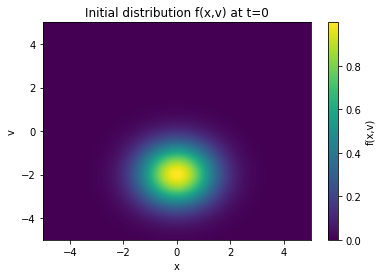

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Position and velocity grid
x = np.linspace(-5, 5, 200)
v = np.linspace(-5, 5, 200)
X, V = np.meshgrid(x, v)

# Initial condition
n0 = 1.0
sigma_x = 1.0
v0 = 2.0
sigma_v = 1.0

n_x = n0 * np.exp(-X**2 / (2 * sigma_x**2))
f_p = np.exp(-(V - v0)**2 / (2 * sigma_v**2))
f0 = n_x * f_p

plt.imshow(f0, extent=[x.min(), x.max(), v.min(), v.max()], aspect='auto')
plt.title("Initial distribution f(x,v) at t=0")
plt.xlabel("x")
plt.ylabel("v")
plt.colorbar(label='f(x,v)')
plt.show()

In [ ]:
# Simulate a set of particles moving in 1D inside a harmonic potential:
# U(x)=1/2*kx^2
# Start with random initial positions and velocities not at equilibrium, 
# and show that the system evolves toward the Maxwell-Boltzmann distribution.


# Equations of motion
# dx/dt = v
# dv/dt = -k/m*x

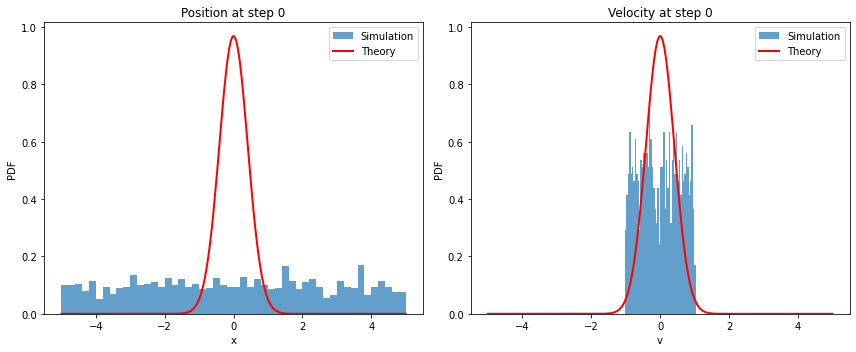

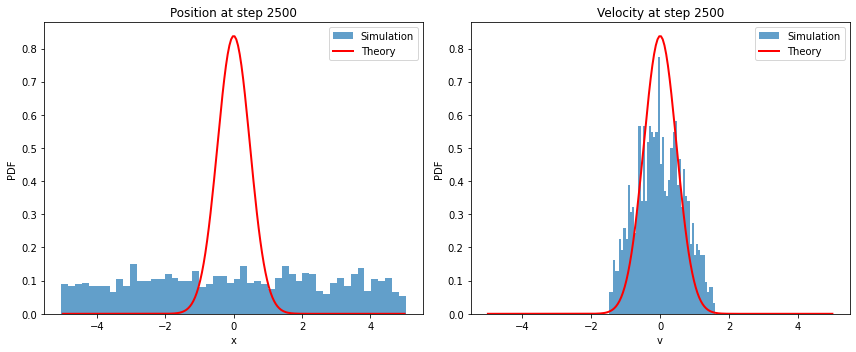

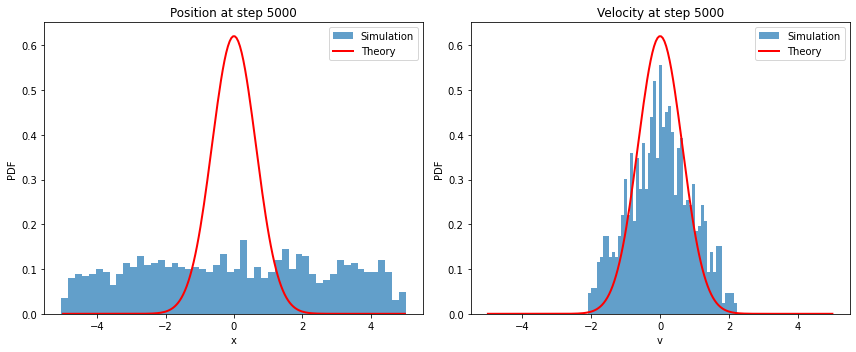

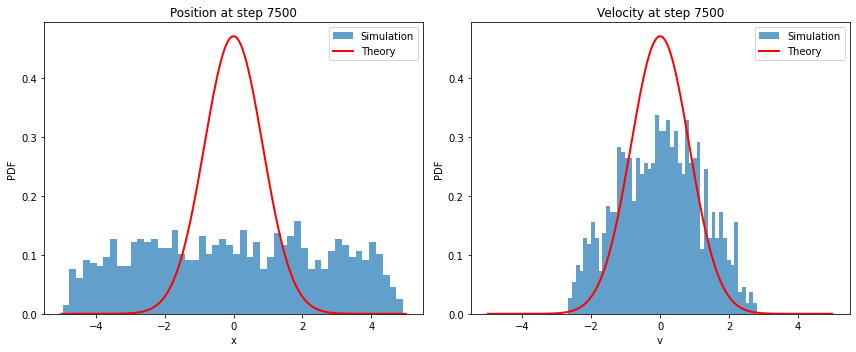

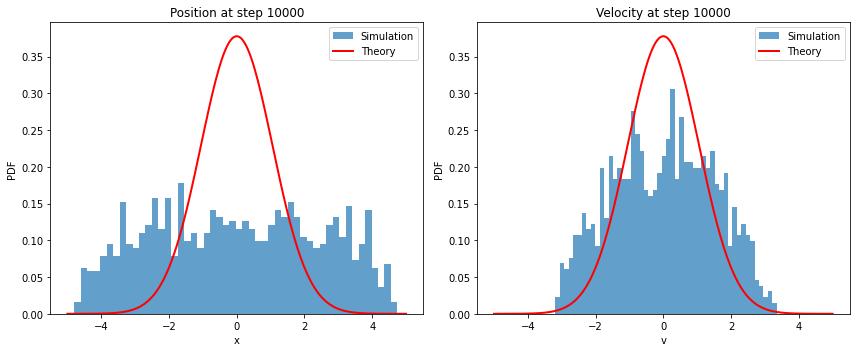

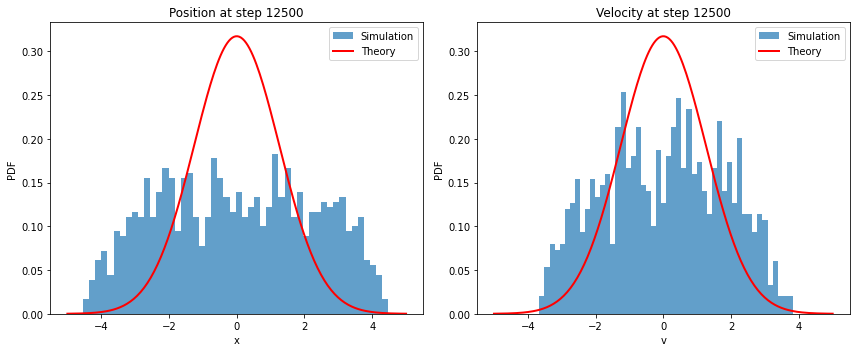

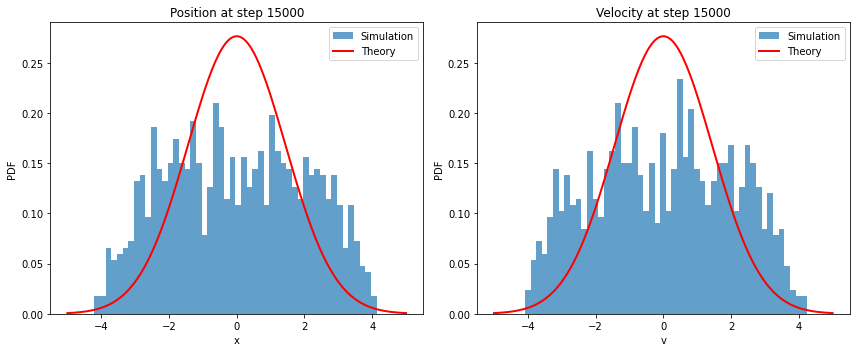

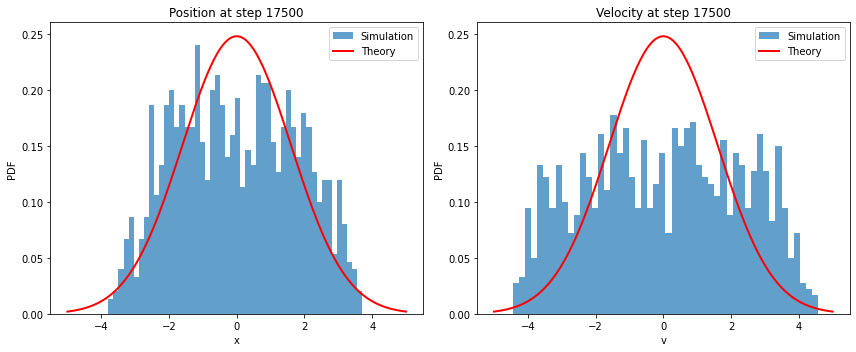

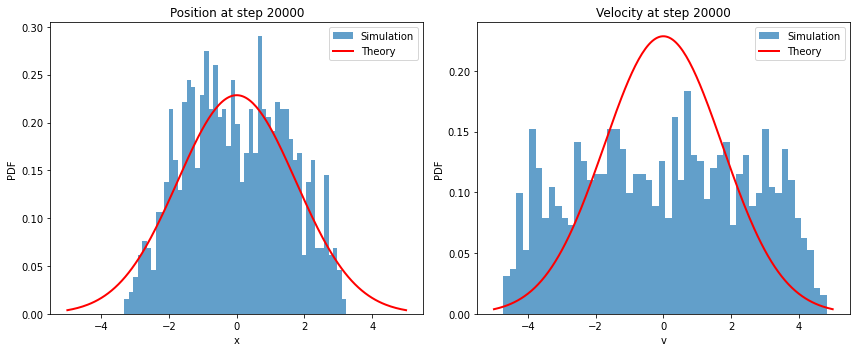

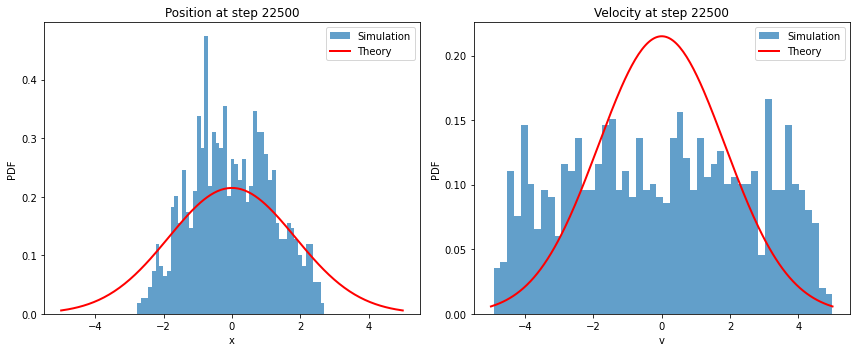

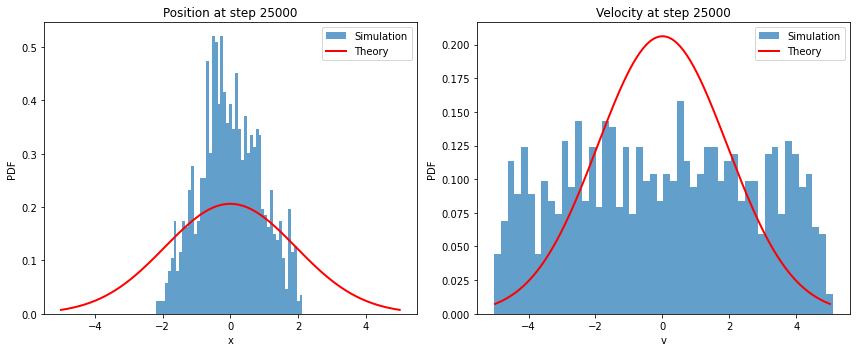

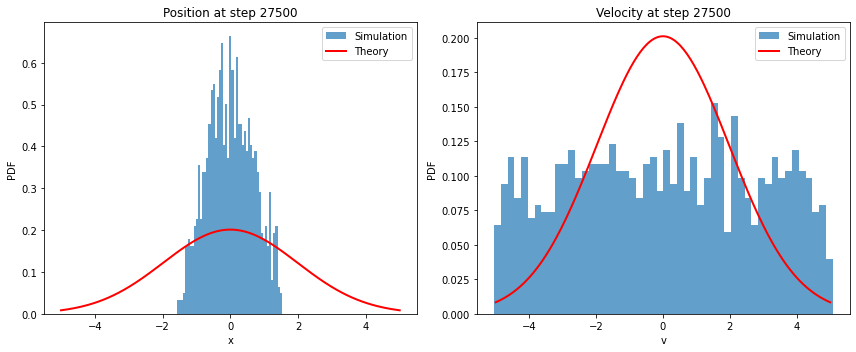

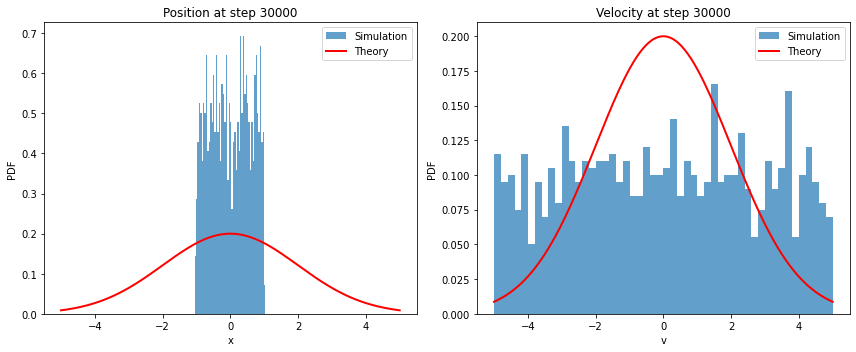

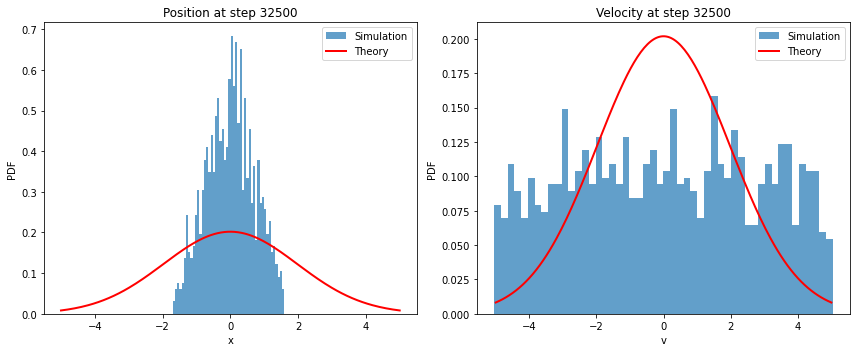

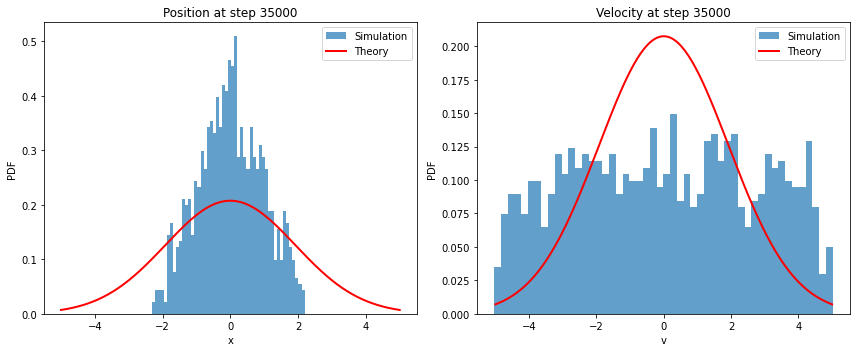

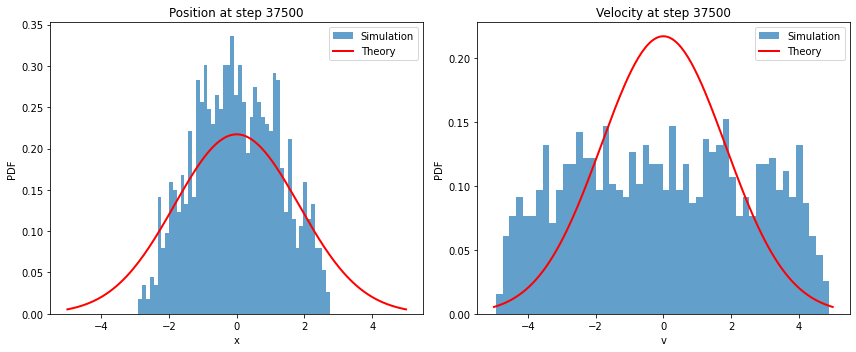

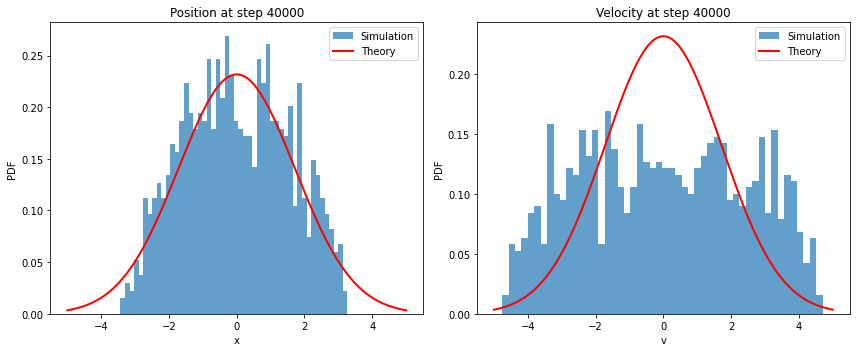

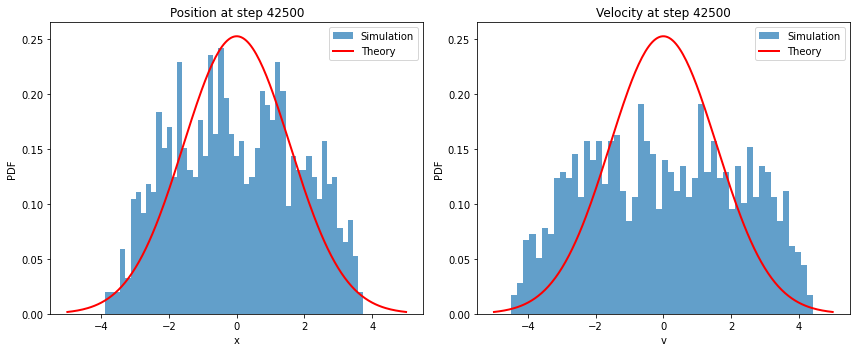

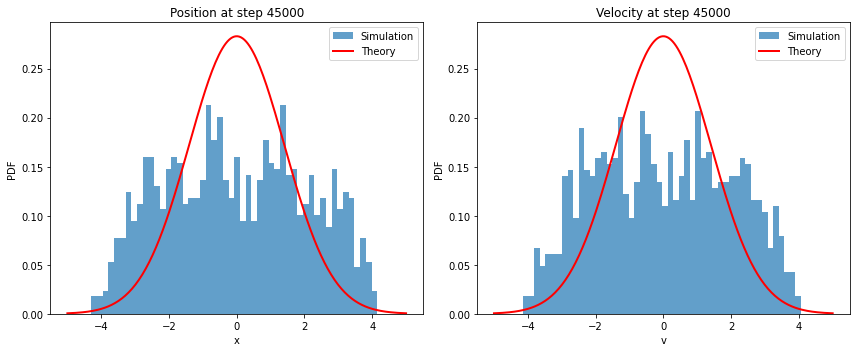

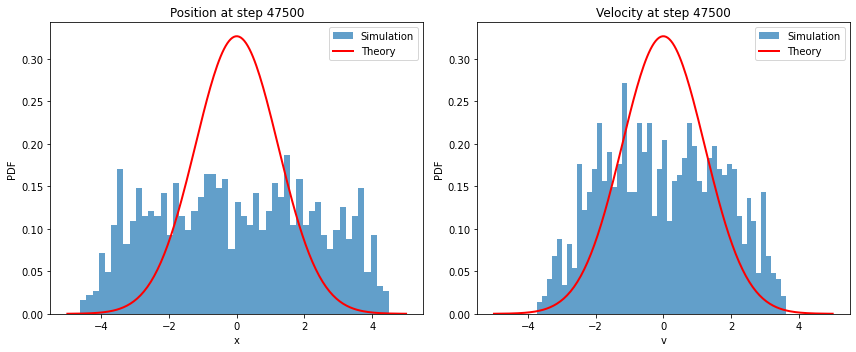

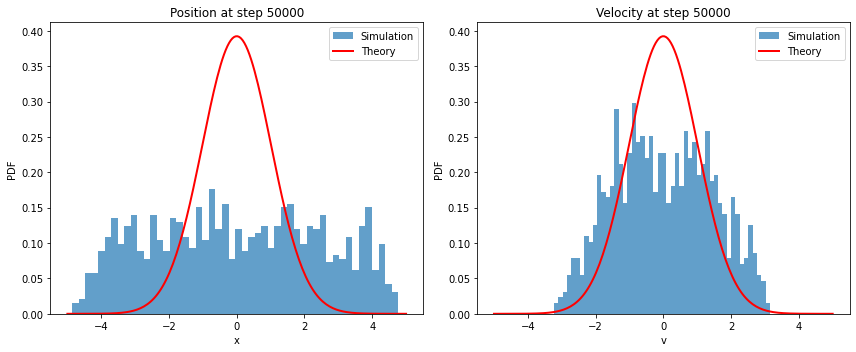

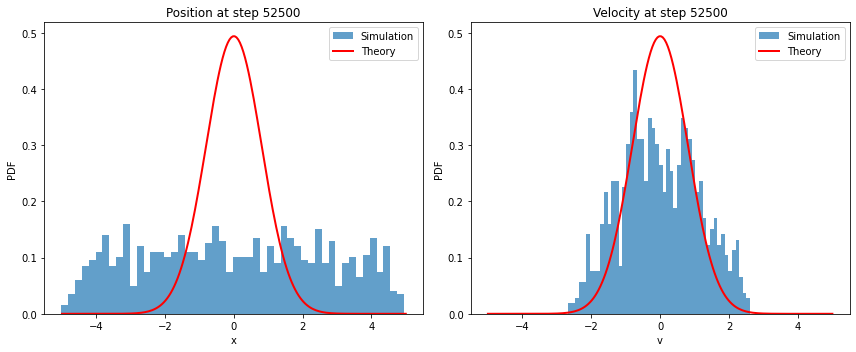

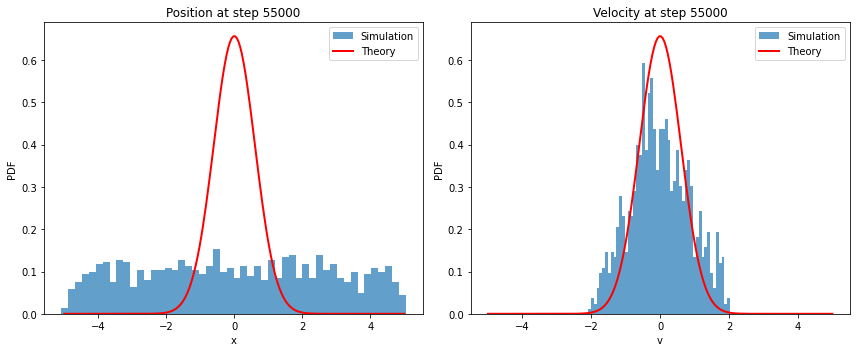

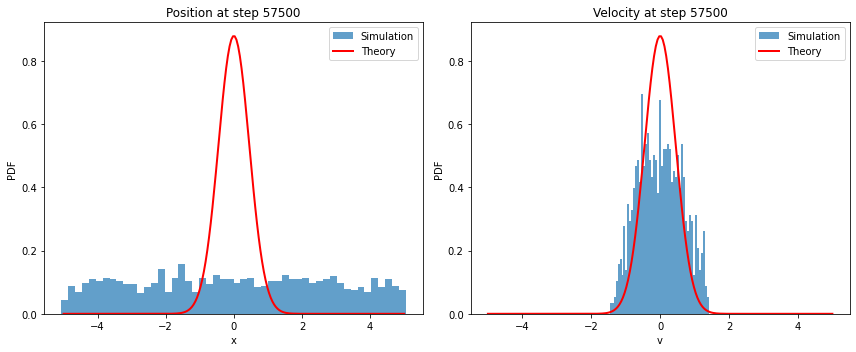

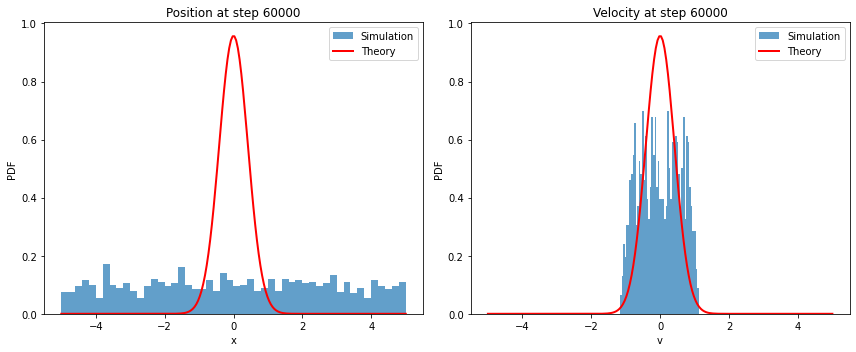

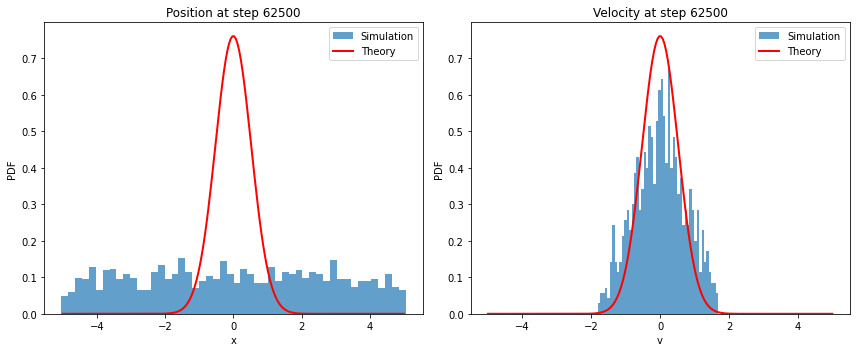

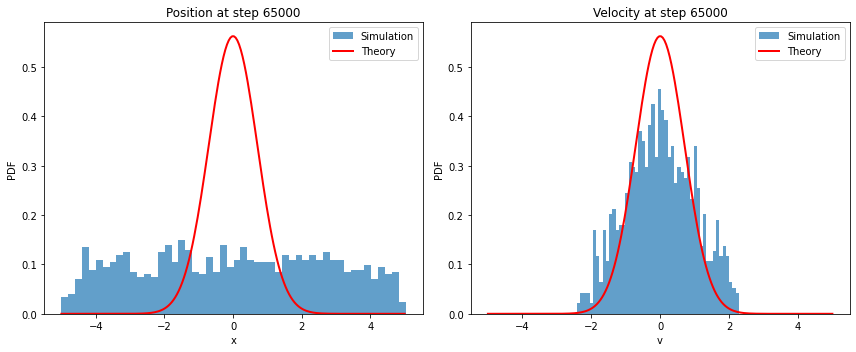

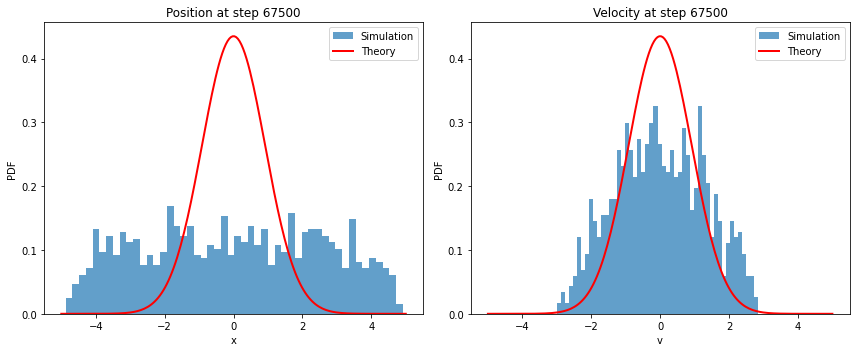

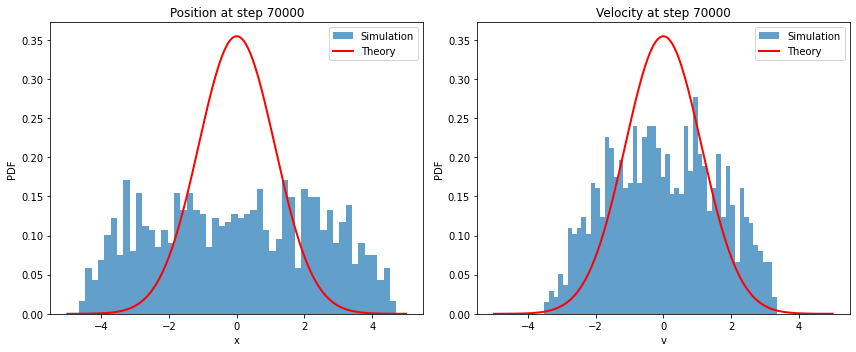

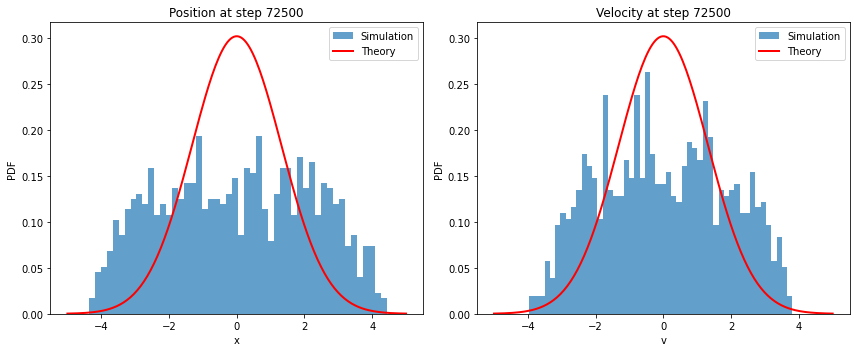

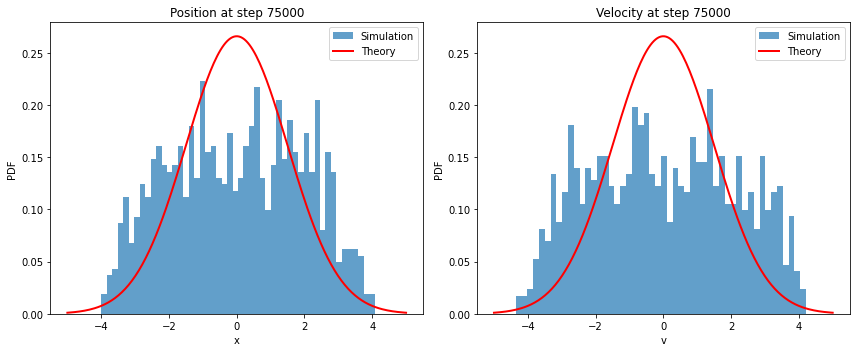

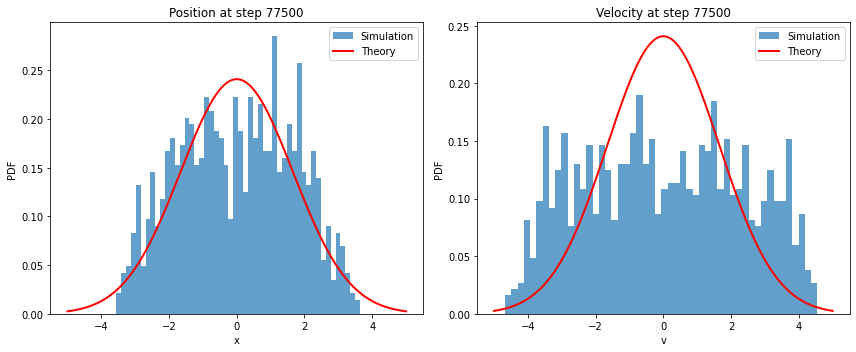

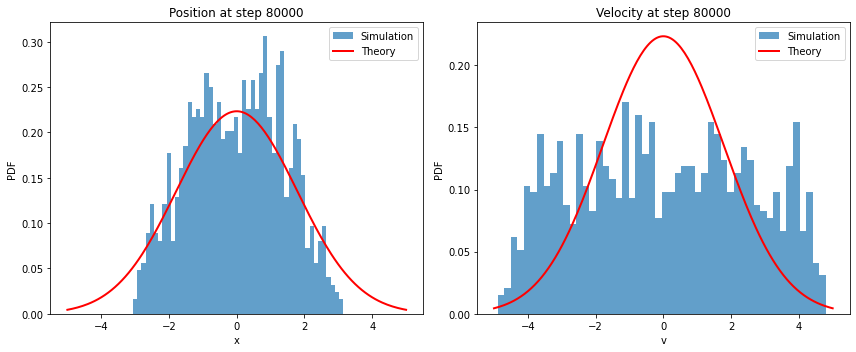

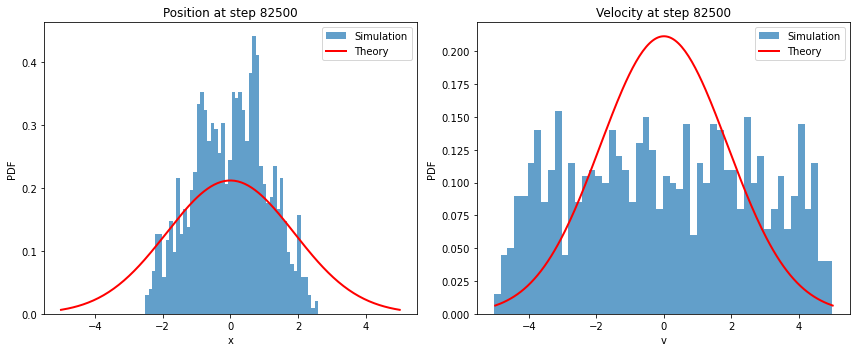

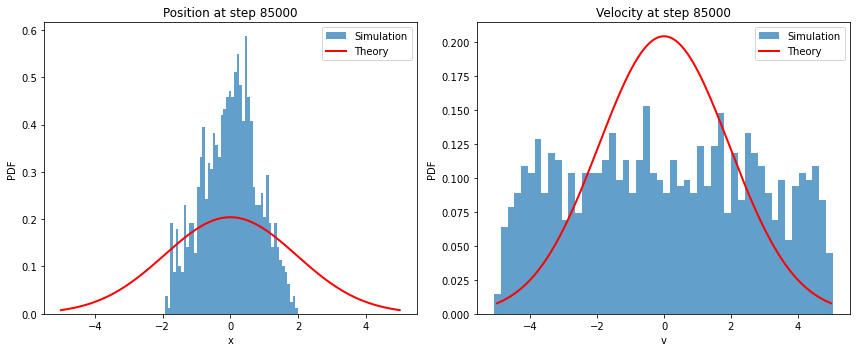

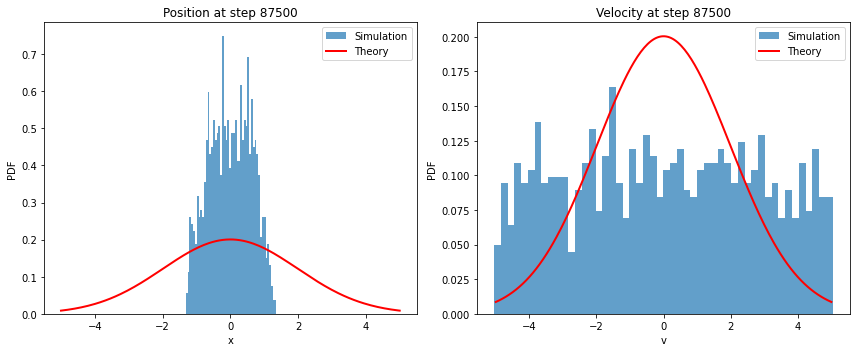

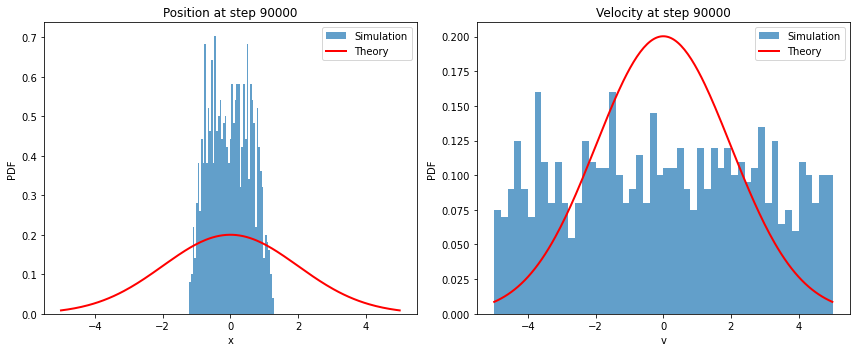

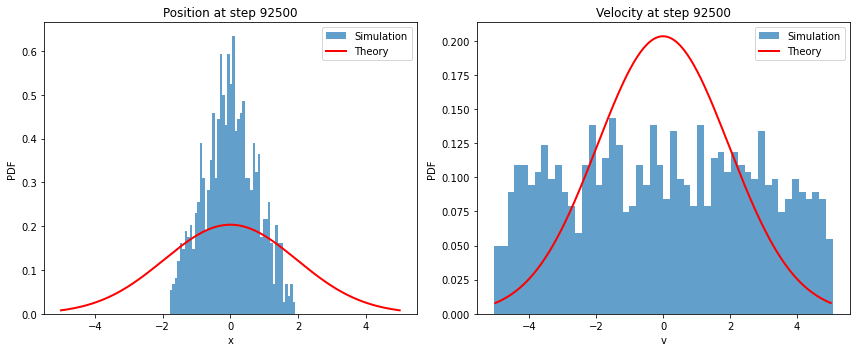

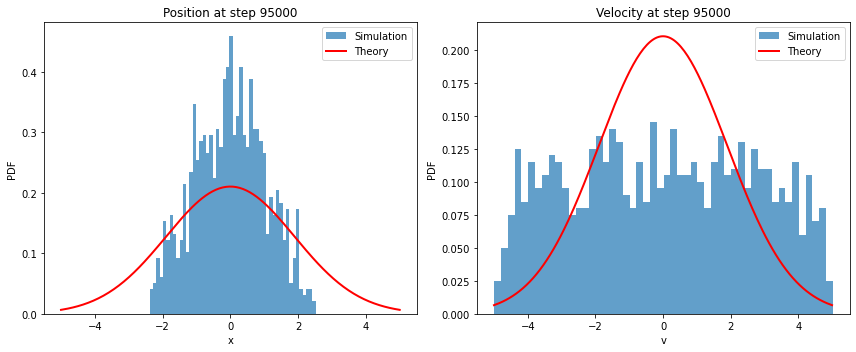

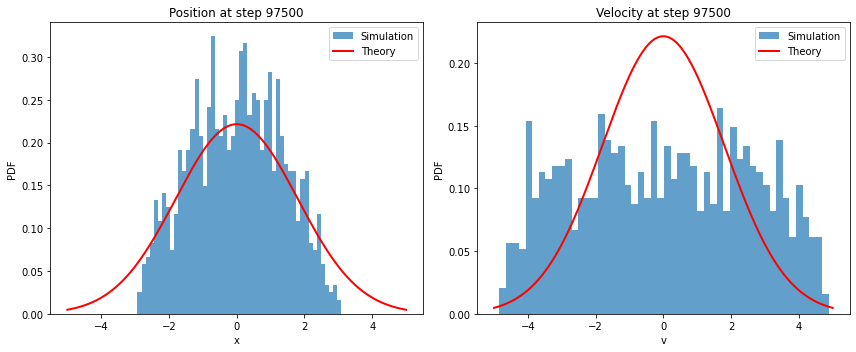

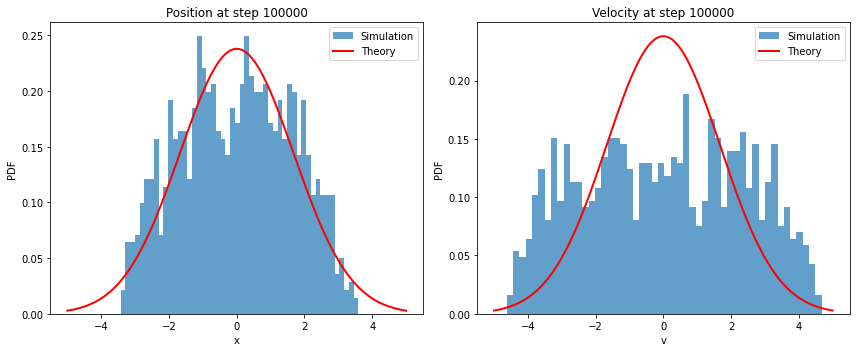

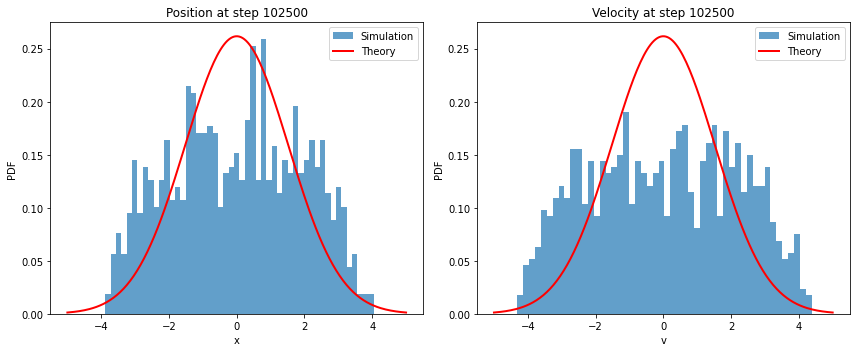

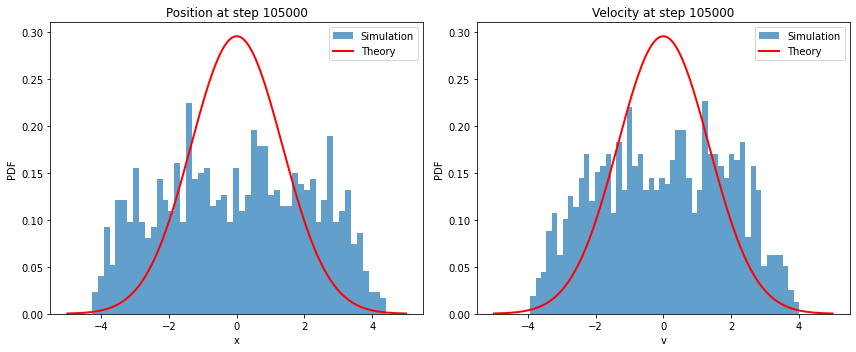

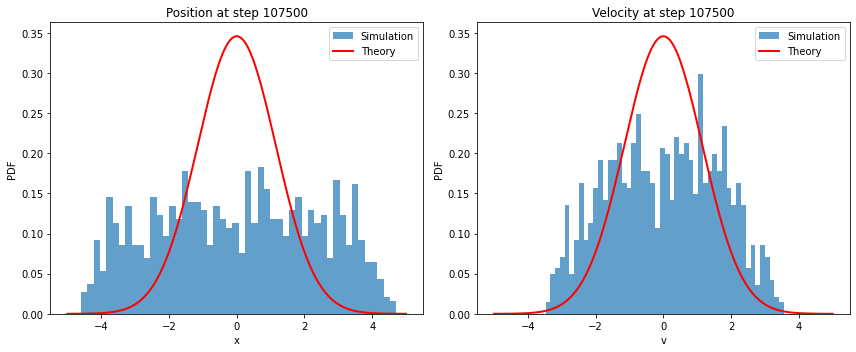

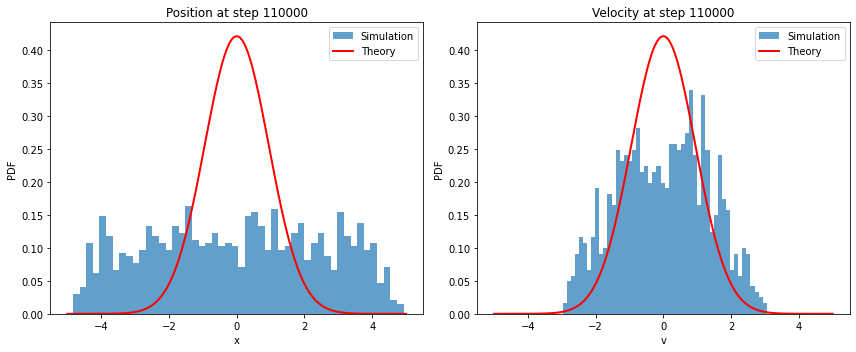

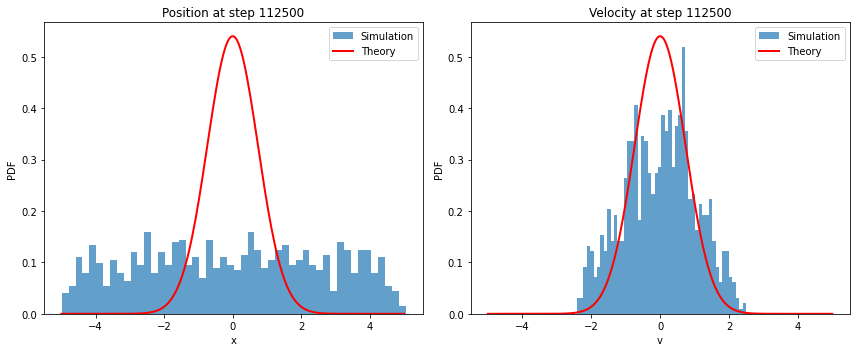

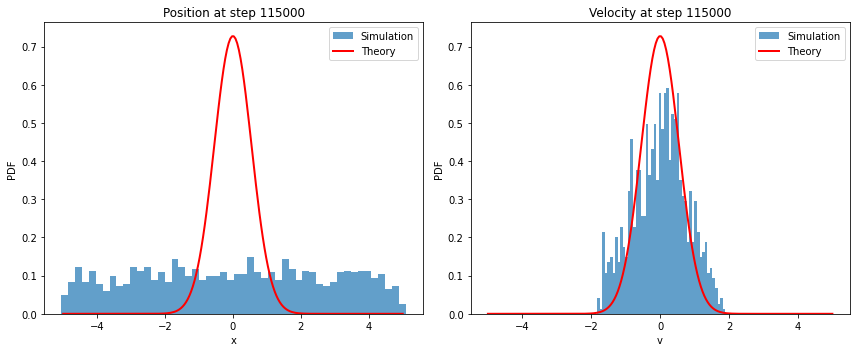

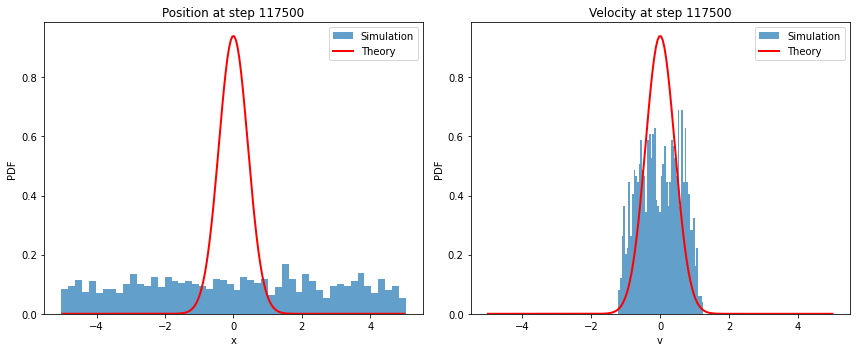

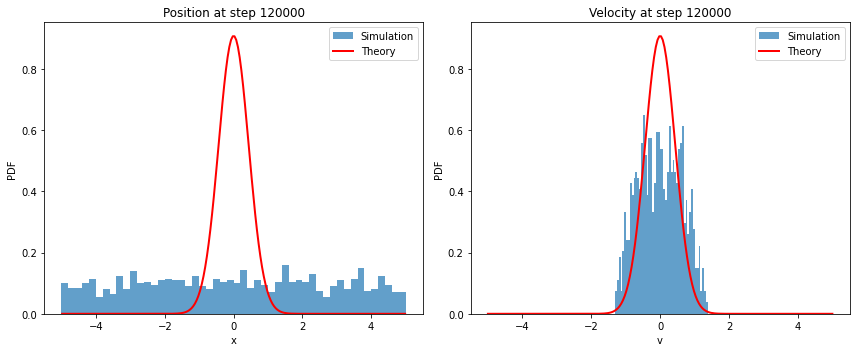

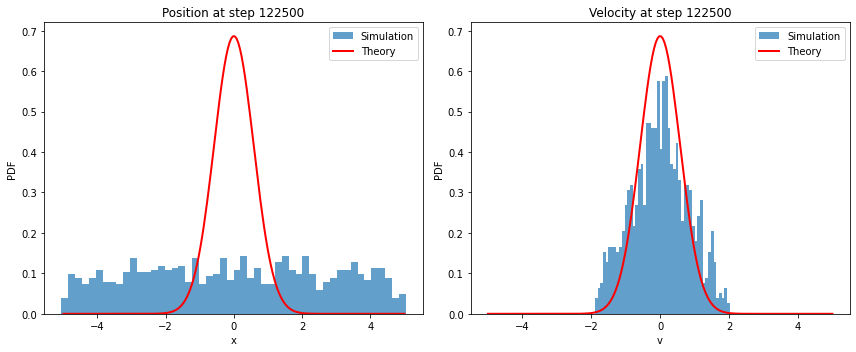

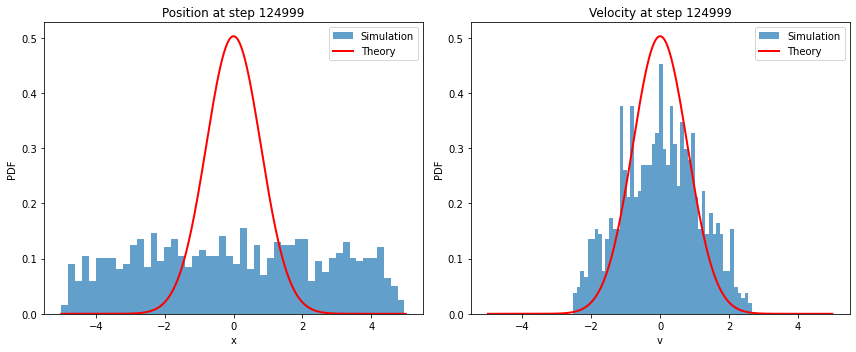

In [3]:
# Runge Kutta 4th order
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_particles = 1000   # Number of particles
m = 1.0
k = 1.0

dt = 0.01
Num_steps = 125000  # 125 time units = 12500

# Initial conditions: random positions and velocities
x = np.random.uniform(-5, 5, N_particles)
v = np.random.uniform(-1, 1, N_particles)


# Array to save all positions and velocities
x_position = np.zeros((Num_steps+1, N_particles))
velocity = np.zeros((Num_steps+1, N_particles))
x_position[0,:] = x
velocity[0,:] = v

# RK4 integrator for harmonic oscillator
def rk4_step(x, v, dt, k, m):
    k1x = v
    k1v = -(k/m)*x

    k2x = v + 1/2 * dt * k1v
    k2v = -(k/m) * (x + 1/2 * dt * k1x)

    k3x = v + 1/2 * dt * k2v
    k3v = -(k/m) * (x + 1/2 * dt * k2x)

    k4x = v + dt * k3v
    k4v = -(k/m) * (x + dt * k3x)

    x_new = x + (dt/6)*(k1x + 2*k2x + 2*k3x + k4x)
    v_new = v + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)

    return x_new, v_new

# Time evolution
for step in range(Num_steps):
    x, v = rk4_step(x, v, dt, k, m)
    
    # Save all positions and velocities
    x_position[step+1,:] = x
    velocity[step+1,:] = v

    # Plot every 2500 steps (~5 oscillations)
    if step % 2500 == 0 or step == Num_steps - 1:
        plt.figure(figsize=(12,5))

        # Position histogram
        plt.subplot(1,2,1)
        plt.hist(x, bins=50, density=True, alpha=0.7, label='Simulation')

        # Theoretical position distribution
        KE = 1/2*m*np.mean(v**2)
        T = KE  # k_B = 1
        sigma_x = np.sqrt(T/k)
        x_vals = np.linspace(-5, 5, 200)
        P_x = 1/(np.sqrt(2*np.pi)*sigma_x)*np.exp(-x_vals**2/(2*sigma_x**2))
        plt.plot(x_vals, P_x, 'r-', lw=2, label='Theory')
        plt.title(f'Position at step {step}')
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.legend()

        # Velocity histogram
        plt.subplot(1,2,2)
        plt.hist(v, bins=50, density=True, alpha=0.7, label='Simulation')

        sigma_v = np.sqrt(T/m)
        v_vals = np.linspace(-5, 5, 200)
        P_v = 1/(np.sqrt(2*np.pi)*sigma_v)*np.exp(-v_vals**2/(2*sigma_v**2))
        plt.plot(v_vals, P_v, 'r-', lw=2, label='Theory')
        plt.title(f'Velocity at step {step}')
        plt.xlabel('v')
        plt.ylabel('PDF')
        plt.legend()

        plt.tight_layout()
        plt.show()

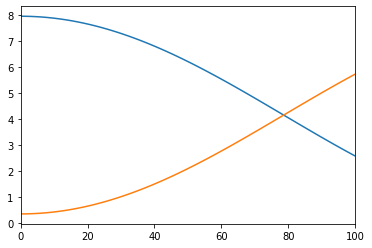

In [24]:
InterpolationSize = 1
VarX = np.zeros(Num_steps//InterpolationSize)
VarV = np.zeros(Num_steps//InterpolationSize)
for i in range(Num_steps//InterpolationSize):
    VarX[i] += np.var(x_position[i*InterpolationSize,:])
    VarV[i] += np.var(velocity[i*InterpolationSize,:])

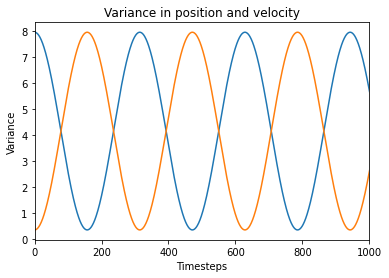

In [27]:
plt.plot(VarX)
plt.plot(VarV)
plt.xlim(0,1000)
plt.title('Variance in position and velocity')
plt.xlabel('Timesteps')
plt.ylabel('Variance')
plt.show()

In [ ]:
# We see that the velocity distribution quickly resembles a Gaussian, but the positions do not.
# Then the positions become Gaussian while the velicities become random again. These two cycle back and forth.
# This is phase mixing, where the position and velocity oscillate with the same frequency but their phases are shifted.

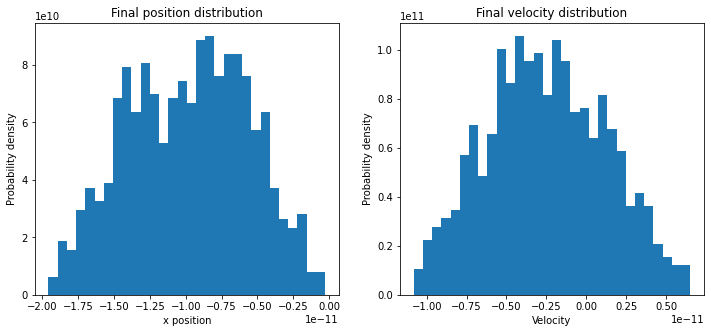

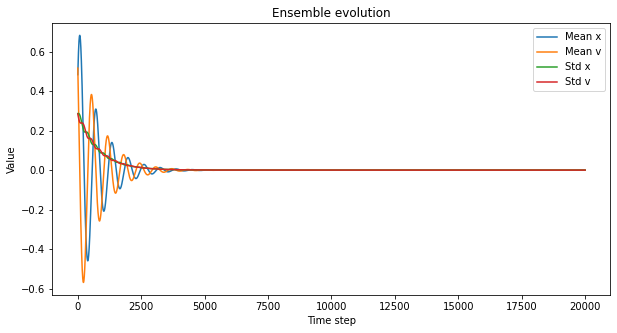

In [38]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0
omega = 1.0
gamma = 0.25
dt = 0.01
steps = 20000
N = 1000  # number of particles

# Force function for all particles
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x - (gamma/m) * v
    return np.array([dxdt, dvdt])

# Initial conditions (Gaussian distribution for example)
x0 = np.random.uniform(0, 1.0, N)
v0 = np.random.uniform(0, 1.0, N)
y = np.array([x0, v0])  # shape (2, N)

# Storage for means over time
mean_x = [np.mean(x0)]
mean_v = [np.mean(v0)]
std_x = [np.std(x0)]
std_v = [np.std(v0)]
VarX = np.zeros(steps)
VarV = np.zeros(steps)

# Time evolution with RK4 (vectorized)
for i in range(steps):
    t = i * dt
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    k3 = f(t + dt/2, y + dt/2 * k2)
    k4 = f(t + dt, y + dt * k3)
    y = y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    mean_x.append(np.mean(y[0]))
    mean_v.append(np.mean(y[1]))
    std_x.append(np.std(y[0]))
    std_v.append(np.std(y[1]))
    VarX[i] = np.var(y[0])
    VarV[i] = np.var(y[1])

# Final histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(y[0], bins=30, density=True)
plt.xlabel('x position')
plt.ylabel('Probability density')
plt.title('Final position distribution')

plt.subplot(1,2,2)
plt.hist(y[1], bins=30, density=True)
plt.xlabel('Velocity')
plt.ylabel('Probability density')
plt.title('Final velocity distribution')

plt.show()

# Time evolution of mean and spread
plt.figure(figsize=(10,5))
plt.plot(mean_x, label='Mean x')
plt.plot(mean_v, label='Mean v')
plt.plot(std_x, label='Std x')
plt.plot(std_v, label='Std v')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Ensemble evolution')
plt.show()


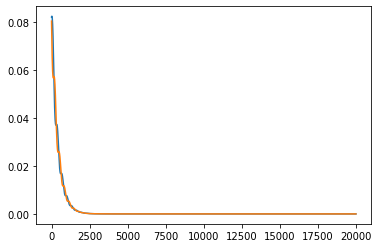

In [39]:
plt.plot(VarX)
plt.plot(VarV)

## Part 2: The Langevin equation

In [ ]:
# Simulating thermalisation requires friction, random noise, or collisions.
# We will make it more realistic by solving the Langevin equation

# We will add a drag term, gamma, and a noise term, eta, to implement stochastic kicks.

# The Langevin equation is a stochastic differential equation (SDE), for which the Euler–Maruyama can be used.
# The RK4 method is used for smooth, deterministic right-hand sides, not for white noise.

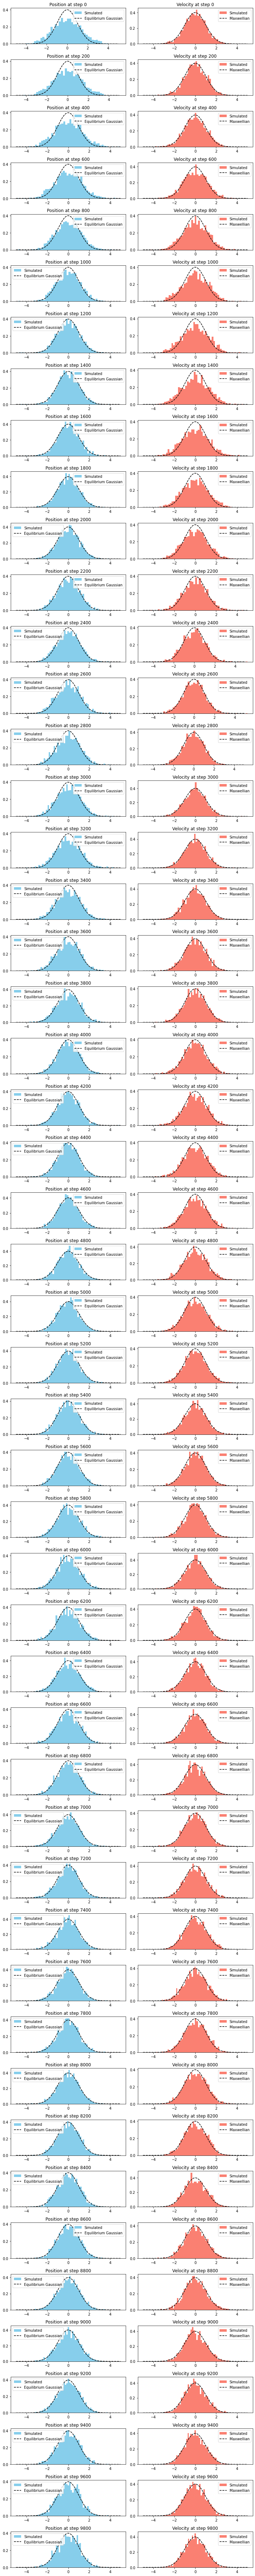

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 2000
T = 1.0
m = 1.0
gamma = 0.25
k = 1.0

D = gamma * T / m

dt = 0.001
Num_steps = 10000
save_every = 200

# Initial conditions: random positions and velocities
x = np.random.normal(0, np.sqrt(2), N)
v = np.random.normal(0, 1, N)

x_histories = []
v_histories = []

for step in range(Num_steps):
    x += v * dt
    v += (-gamma/m * v - k/m * x) * dt + np.sqrt(2 * D / m * dt) * np.random.randn(N)
    
    if step % save_every == 0:
        x_histories.append(x.copy())
        v_histories.append(v.copy())

sigma_x = np.sqrt(T / k)
sigma_v = np.sqrt(T / m)

fig, axes = plt.subplots(len(x_histories), 2, figsize=(10, 2*len(x_histories)))

for i, (x_vals, v_vals) in enumerate(zip(x_histories, v_histories)):
    # Position
    axes[i, 0].hist(x_vals, bins=50, density=True, color='skyblue', label='Simulated')
    x_range = np.linspace(-5*sigma_x, 5*sigma_x, 200)
    pos_pdf = norm.pdf(x_range, 0, sigma_x)
    axes[i, 0].plot(x_range, pos_pdf, 'k--', label='Equilibrium Gaussian')
    axes[i, 0].set_title(f'Position at step {i*save_every}')
    axes[i, 0].legend()
    
    # Velocity
    axes[i, 1].hist(v_vals, bins=50, density=True, color='salmon', label='Simulated')
    v_range = np.linspace(-5*sigma_v, 5*sigma_v, 200)
    v_pdf = norm.pdf(v_range, 0, sigma_v)
    axes[i, 1].plot(v_range, v_pdf, 'k--', label='Maxwellian')
    axes[i, 1].set_title(f'Velocity at step {i*save_every}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


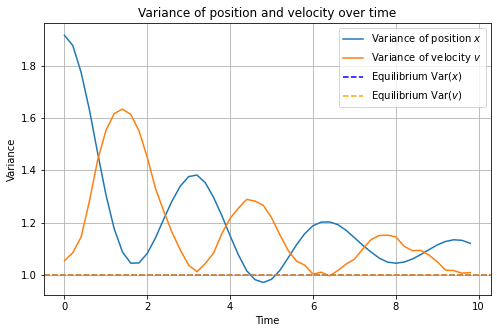

In [181]:
times = np.arange(len(x_histories)) * save_every * dt

# Compute variances over particles at each saved snapshot
var_x = [np.var(x_snapshot) for x_snapshot in x_histories]
var_v = [np.var(v_snapshot) for v_snapshot in v_histories]
VarX2 = [np.var(x_snapshot)**2 for x_snapshot in x_histories]
VarV2 = [np.var(v_snapshot)**2 for v_snapshot in v_histories]

plt.figure(figsize=(8,5))
plt.plot(times, var_x, label='Variance of position $x$')
plt.plot(times, var_v, label='Variance of velocity $v$')

# Add expected equilibrium values as horizontal lines
sigma_x_eq = np.sqrt(T / k)
sigma_v_eq = np.sqrt(T / m)

plt.axhline(y=sigma_x_eq**2, color='blue', linestyle='--', label='Equilibrium $\\mathrm{Var}(x)$')
plt.axhline(y=sigma_v_eq**2, color='orange', linestyle='--', label='Equilibrium $\\mathrm{Var}(v)$')

plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend()
plt.title('Variance of position and velocity over time')
plt.grid(True)
plt.show()

In [ ]:
# The drag and noise term balance each other, so the positions and velocities will settle towards a Maxwellian distribution.
# The variance in position and velocity will oscillate around that of a Maxwellian distribution because of the noise term.

## Part 3: The 1D BGK Boltzmann model

In [82]:
# BGK model to evolve distribution function
# df/dt + v*df/dx + F*df/dv = ν*(f - f_eq) 
# LHS: Free streaming + external force
# RHS: Relaxation to local equilibrium at rate ν.

step    0 | M=0.97980368 P=-8.882e-19 E=0.48989843


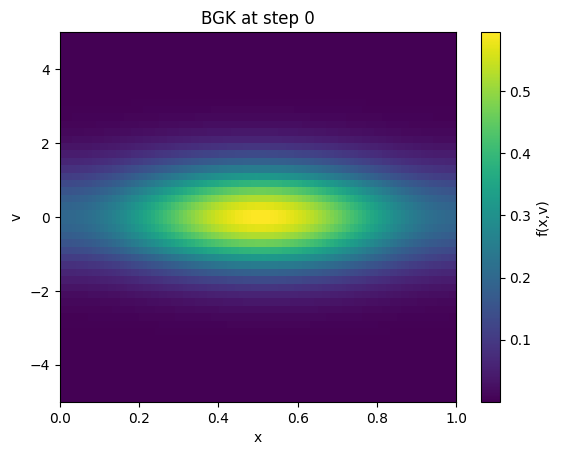

step   50 | M=0.97005333 P=-8.882e-18 E=0.48703117


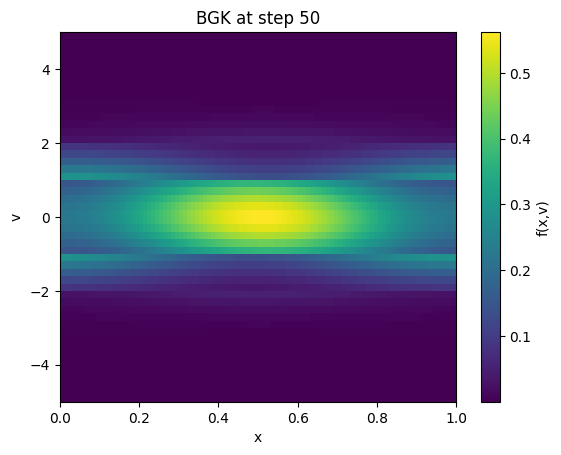

step  100 | M=0.96040002 P=-8.882e-19 E=0.48182292


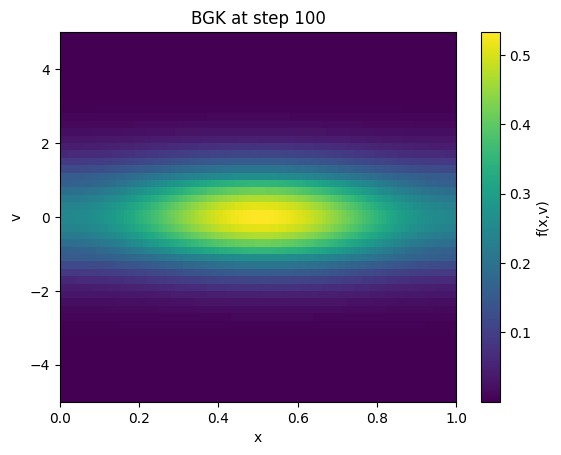

step  150 | M=0.95084277 P=-2.665e-18 E=0.47707389


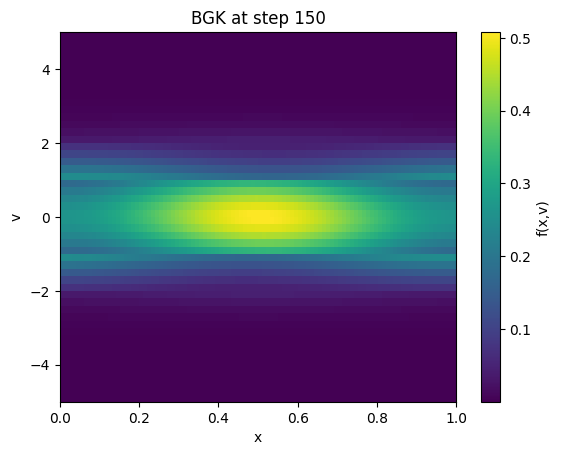

step  200 | M=0.94138064 P=-8.882e-19 E=0.47178613


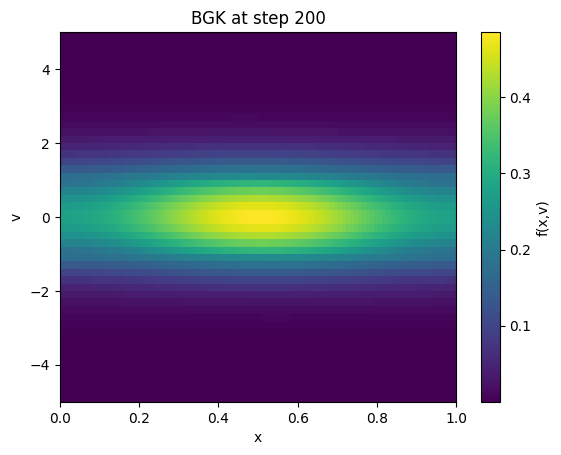

step  250 | M=0.93201266 P=-1.776e-18 E=0.46690390


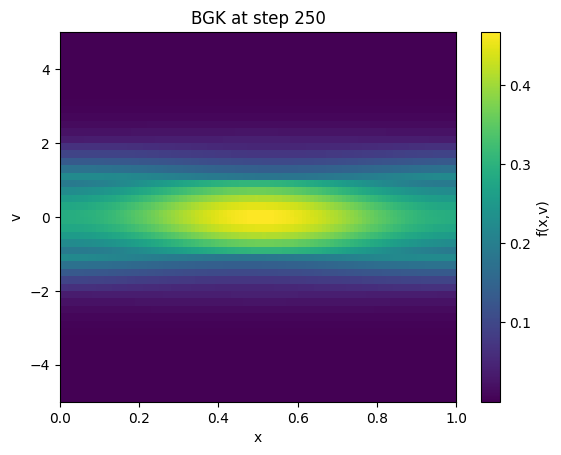

step  300 | M=0.92273791 P=-3.997e-18 E=0.46193203


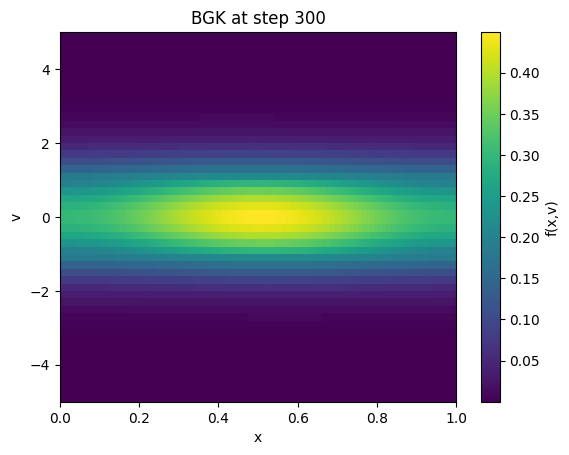

step  350 | M=0.91355546 P=-5.773e-18 E=0.45720350


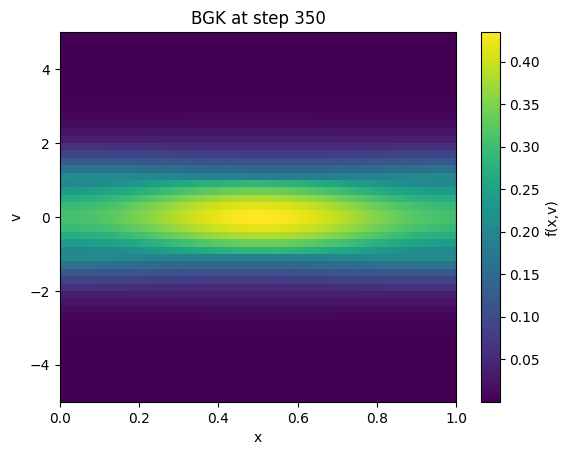

step  400 | M=0.90446438 P=-3.997e-18 E=0.45249279


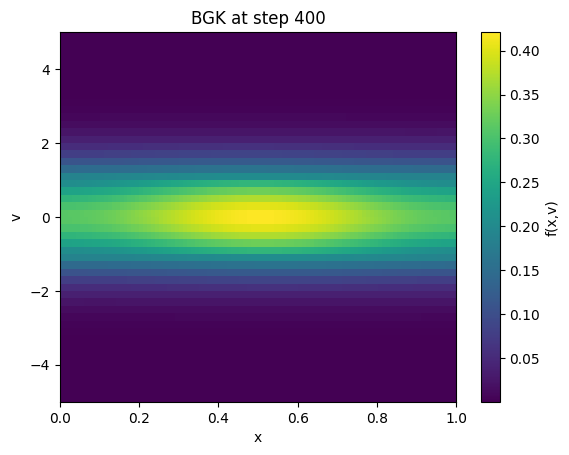

step  450 | M=0.89546377 P=-2.665e-18 E=0.44792122


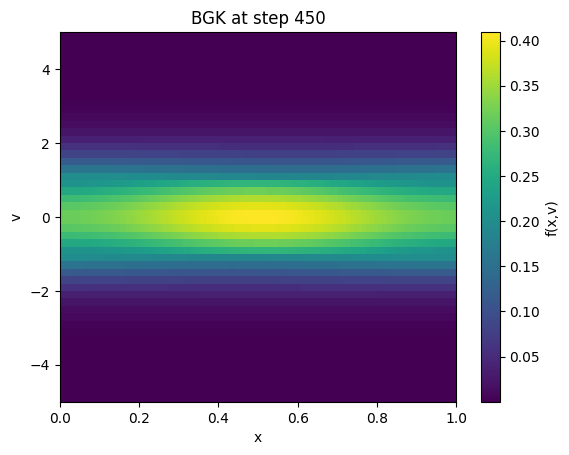

step  500 | M=0.88655274 P=-3.331e-18 E=0.44339057


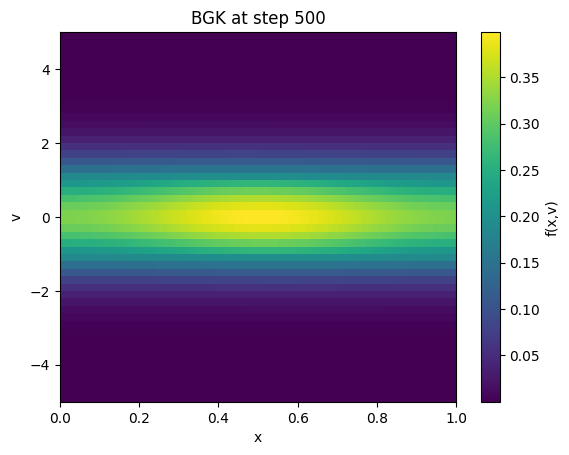

step  550 | M=0.87773037 P=-4.441e-18 E=0.43894606


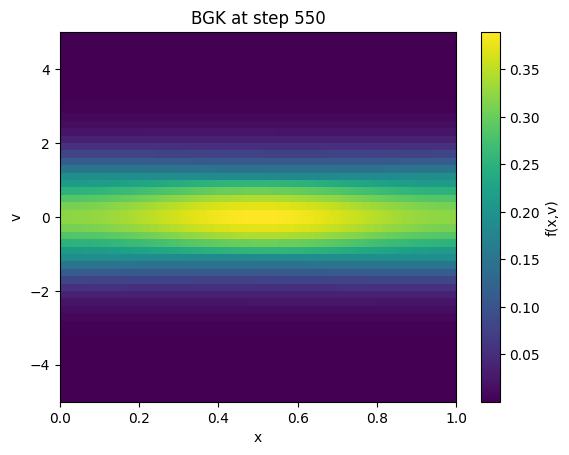

step  600 | M=0.86899580 P=-4.663e-18 E=0.43454593


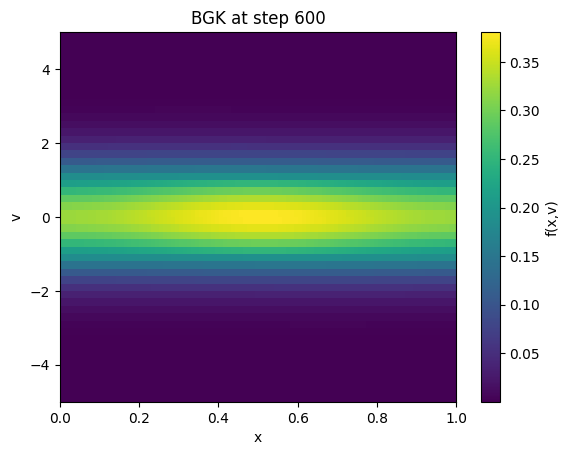

step  650 | M=0.86034816 P=-3.109e-18 E=0.43020721


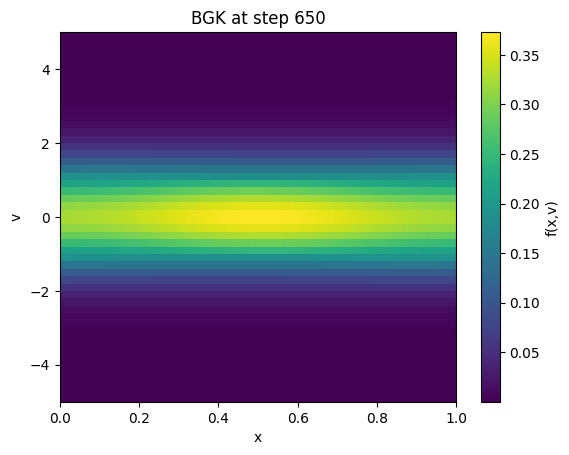

step  700 | M=0.85178656 P=-3.775e-18 E=0.42591230


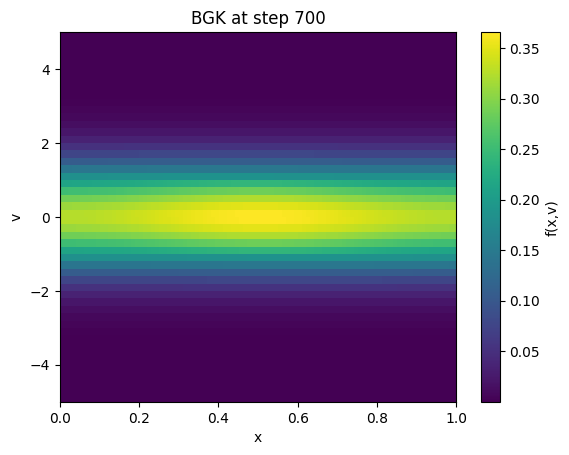

step  750 | M=0.84331017 P=-4.885e-18 E=0.42166757


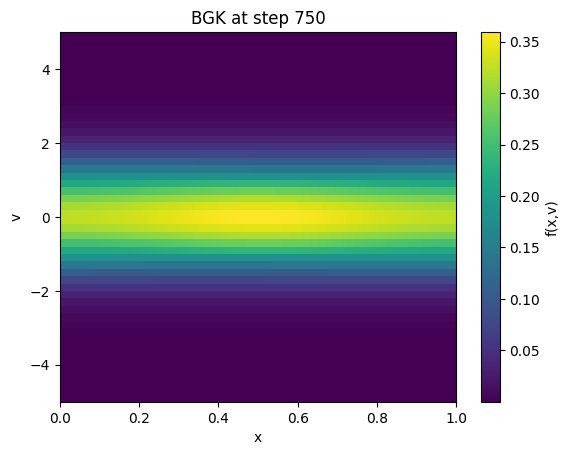

step  800 | M=0.83491813 P=-3.997e-18 E=0.41746551


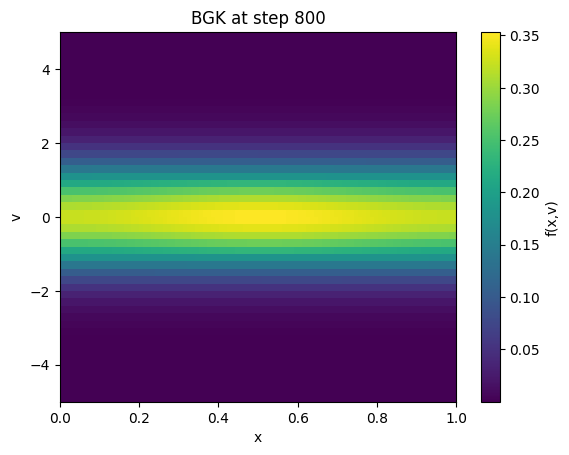

step  850 | M=0.82660959 P=-7.772e-18 E=0.41330838


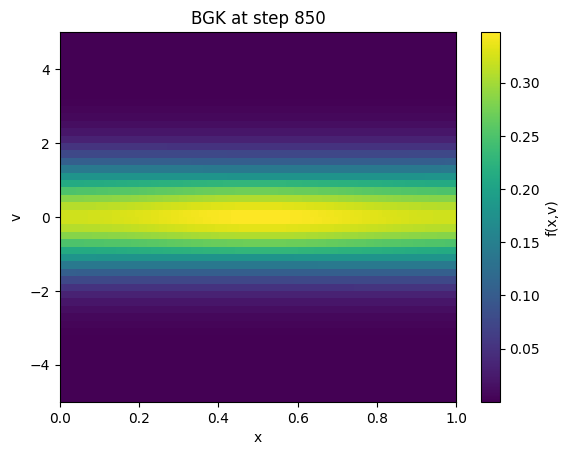

step  900 | M=0.81838374 P=-1.199e-17 E=0.40919287


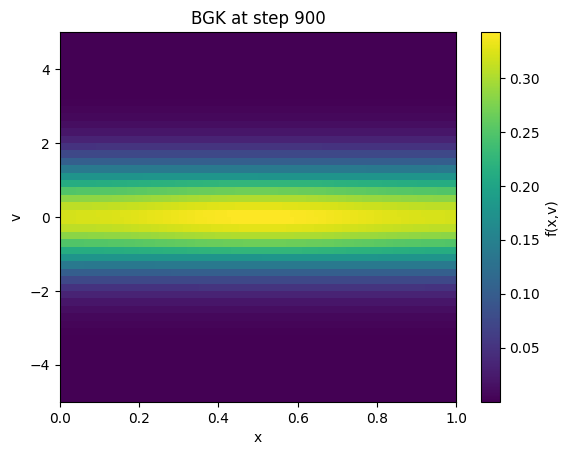

step  950 | M=0.81023975 P=-1.288e-17 E=0.40511961


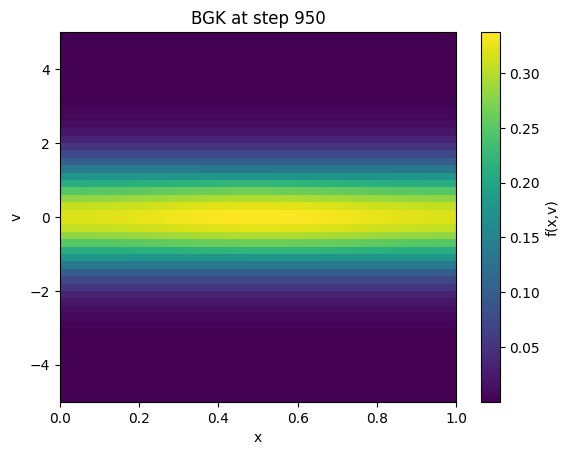

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1D BGK setup
# ---------------------------

Nx = 100  # spatial points
Nv = 50   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|

dx = Lx / Nx
dv = 2 * Lv / Nv

x = np.linspace(-0.5*Lx, 0.5*Lx, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)

# time params
dt = 0.01
nu = 1.0  # collision frequency
steps = 1000

# ---------------------------
# Initial distribution f(x, v)
# ---------------------------

# For example: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)

# ---------------------------
# Helper: compute feq
# ---------------------------

def compute_feq(f):
    # integrate over v to get density and mean velocity at each x
    rho = np.sum(f, axis=1) * dv
    u = np.sum(f * V, axis=1) * dv / rho

    feq = np.zeros_like(f)
    for i in range(Nx):
        feq = rho[:, None] / np.sqrt(2*np.pi) * np.exp(-0.5 * (V - u[:, None])**2)
    return feq

# ---------------------------
# Main loop
# ---------------------------

mass_histories = []
momentum_histories = []
energy_histories = []

for step in range(steps):
    # Free-streaming step (semi-Lagrangian)
    for j in range(Nv):
        shift = -v[j] * dt / dx
        f[:, j] = np.roll(f[:, j], int(shift))
    
    # Collision (BGK relaxation)
    feq = compute_feq(f)
    f += -nu * (f - feq) * dt

    if step % 50 == 0:
        # Check conservation of mass, omentum, and energy
        mass     = np.sum(f)*dx*dv
        momentum = np.sum(f*V)*dx*dv
        energy   = 0.5*np.sum(f*V**2)*dx*dv
        print(f"step {step:4d} | M={mass:.8f} P={momentum:.3e} E={energy:.8f}")

        mass_histories.append(mass)
        momentum_histories.append(momentum)
        energy_histories.append(energy)

        plt.clf()
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x')
        plt.ylabel('v')
        plt.pause(0.1)

plt.show()

Text(0.5, 1.0, 'Conservation of mass, momentum, and energy with BGK')

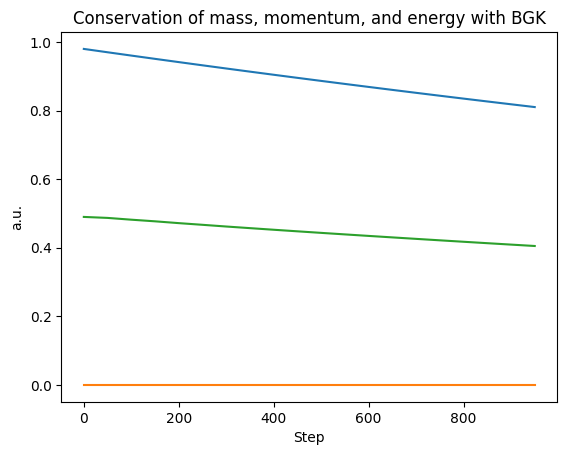

In [5]:
Timesteps = np.arange(0, steps, 50)
plt.plot(Timesteps, mass_histories)
plt.plot(Timesteps, momentum_histories)
plt.plot(Timesteps, energy_histories)
plt.xlabel('Step')
plt.ylabel('a.u.')
plt.title('Conservation of mass, momentum, and energy with BGK')

In [ ]:
# We see that the mass, momentum, in the system are not conserved.
# Now we will look at improving the numerics to see if the conservation can be modelled better.

step    0 | M=0.99499950 P=1.064e-16 E=0.49749318


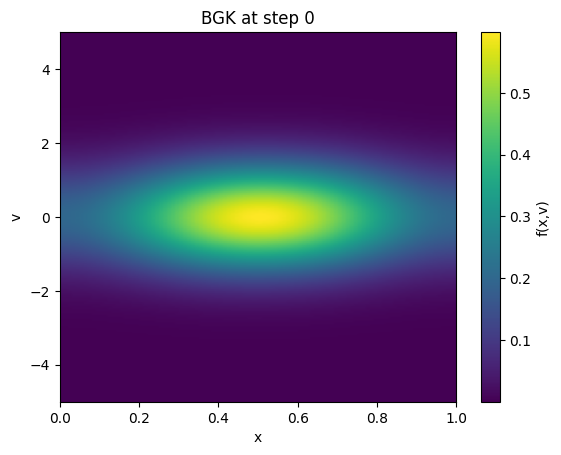

step   50 | M=0.99499950 P=9.592e-17 E=0.49748355


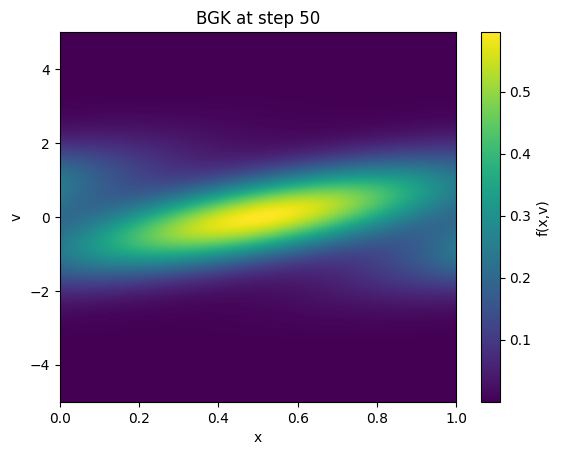

step  100 | M=0.99499950 P=1.288e-16 E=0.49747811


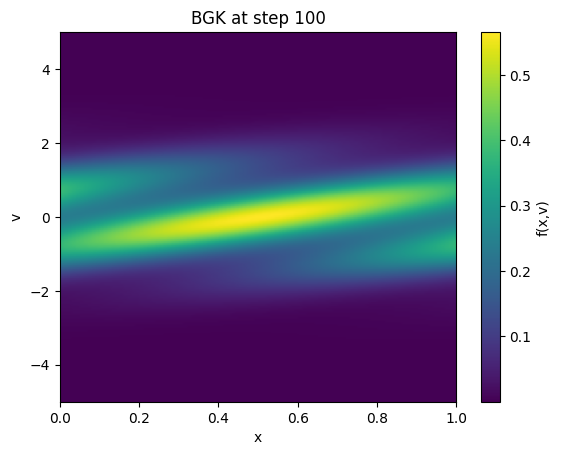

step  150 | M=0.99499950 P=1.772e-16 E=0.49747647


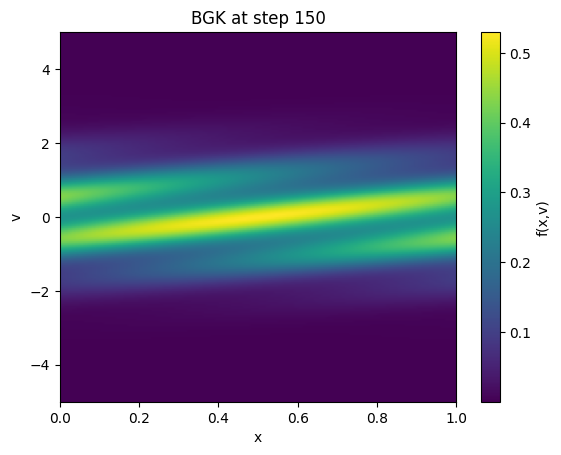

step  200 | M=0.99499950 P=7.994e-17 E=0.49747484


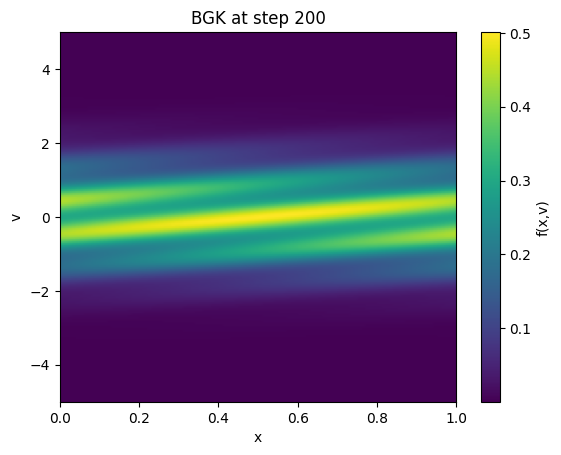

step  250 | M=0.99499950 P=7.283e-17 E=0.49747321


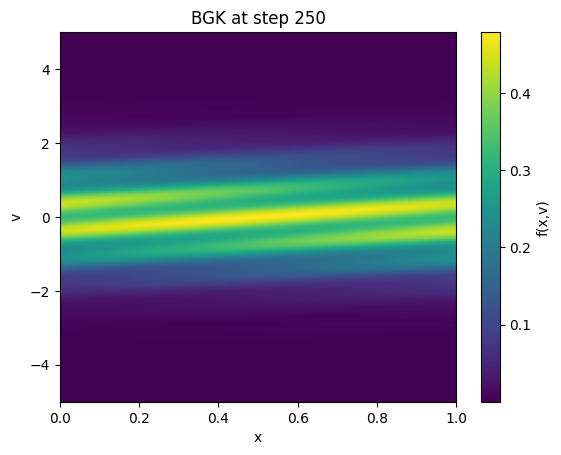

step  300 | M=0.99499950 P=1.363e-16 E=0.49747158


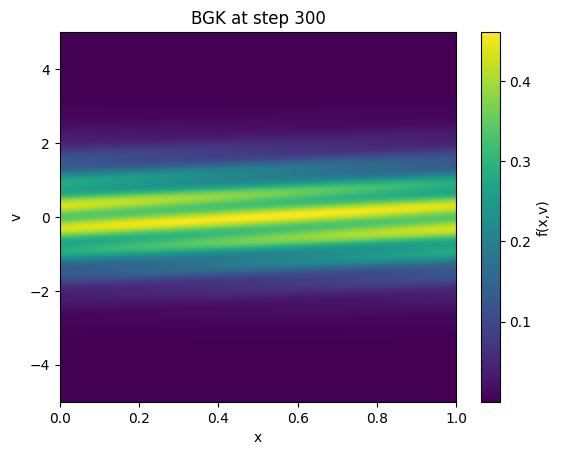

step  350 | M=0.99499950 P=2.105e-16 E=0.49746995


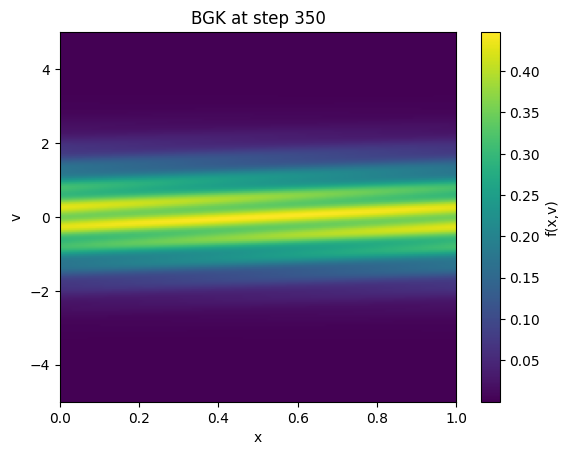

step  400 | M=0.99499950 P=2.309e-16 E=0.49746833


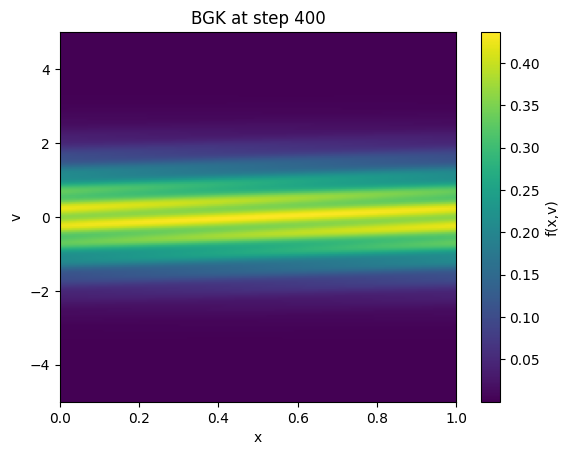

step  450 | M=0.99499950 P=2.949e-16 E=0.49746670


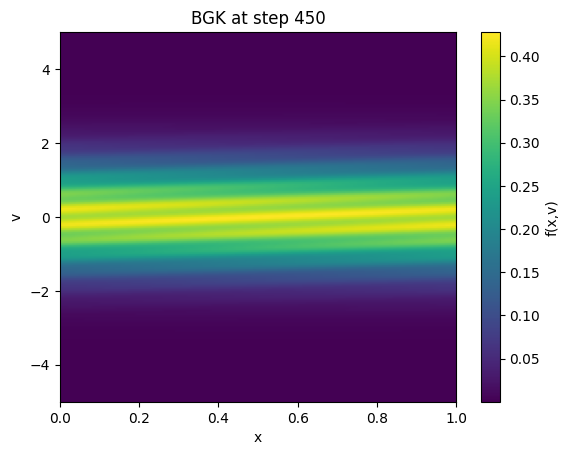

step  500 | M=0.99499950 P=2.305e-16 E=0.49746507


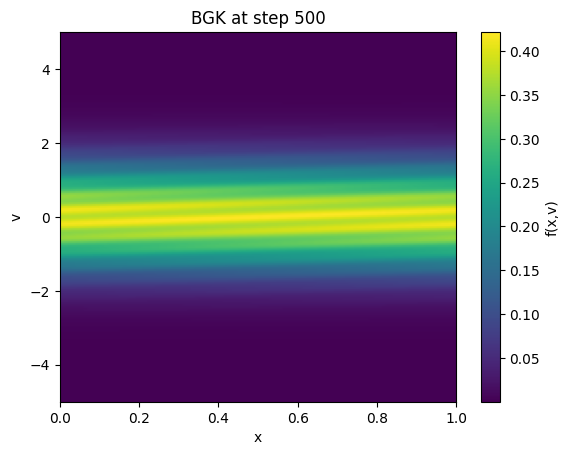

step  550 | M=0.99499950 P=2.069e-16 E=0.49746344


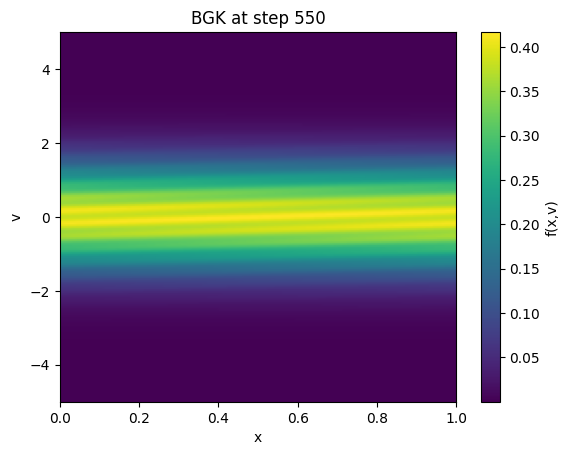

step  600 | M=0.99499950 P=2.700e-16 E=0.49746181


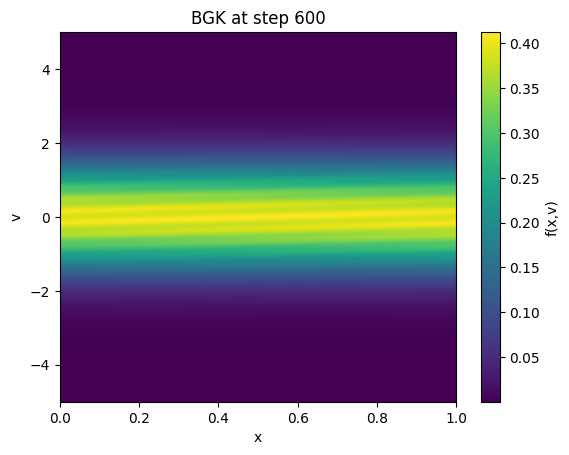

step  650 | M=0.99499950 P=3.006e-16 E=0.49746018


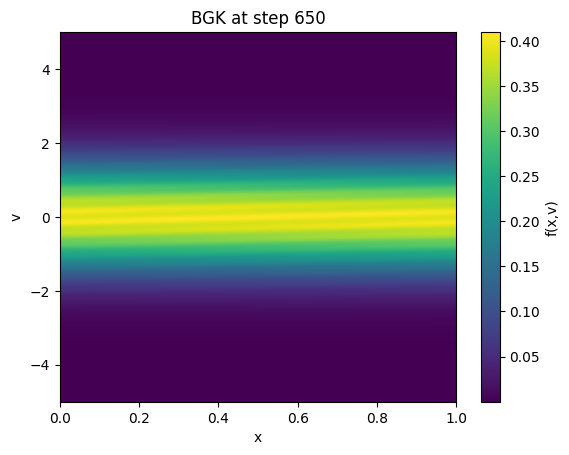

step  700 | M=0.99499950 P=4.143e-16 E=0.49745855


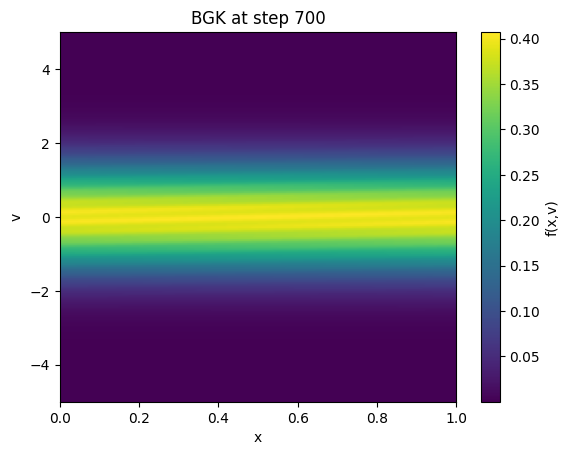

"\n        rho = np.sum(f, axis=1) * dv\n        u   = np.sum(f * V, axis=1) * dv / rho\n        T   = np.sum(f * (V - u[:, None])**2, axis=1) * dv / rho\n\n        plt.subplot(1,2,2)\n        plt.plot(x, rho, label='rho')\n        plt.plot(x, u,   label='u')\n        plt.plot(x, T,   label='T')\n        plt.legend(); plt.tight_layout()\n        plt.pause(0.1)\n"

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1D BGK setup
# ---------------------------

# Discretise phase space

Nx = 100  # spatial points
Nv = 200   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|

dx = Lx / Nx
dv = 2 * Lv / Nv

x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)

# time params
dt = 0.005
nu = 1.0  # collision frequency
steps = 750

# ---------------------------
# Initial distribution f(x, v)
# ---------------------------

# For example: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)

# ---------------------------
# Compute feq, moments,
# ---------------------------

def compute_feq(f):
    # Compute macroscopic moments
    rho = np.sum(f, axis=1) * dv
    u   = np.sum(f * V, axis=1) * dv / rho
    # Local Maxwellian
    feq = np.zeros_like(f)
    for i in range(Nx):
        feq[i, :] = rho[i] / np.sqrt(2*np.pi) * np.exp(-0.5 * (V[i,:] - u[i])**2)
    return feq

def stream_fft(f, v, dt, dx):
    Nx, Nv = f.shape
    k = 2*np.pi*np.fft.fftfreq(Nx, d=dx)
    f_new = np.empty_like(f, dtype=complex)
    for j in range(Nv):
        fh = np.fft.fft(f[:, j])
        fh *= np.exp(-1j * k * v[j] * dt)      # exact shift
        f_new[:, j] = np.fft.ifft(fh)
    return np.real(f_new)


def moments(f, V, dv):
    rho = np.sum(f, axis=1)*dv
    u   = np.sum(f*V, axis=1)*dv / np.maximum(rho,1e-30)
    T   = np.sum(f*(V-u[:,None])**2, axis=1)*dv / np.maximum(rho,1e-30)
    return rho, u, T

def feq_discrete(rho, u, T, V, dv):
    # build weights and normalize *discretely* so ∑_v feq dv = ρ (exact on the grid)
    Tc = np.maximum(T, 1e-12)
    W  = np.exp(-0.5*((V - u[:,None])**2)/Tc[:,None])           # no 1/sqrt(2πT) factor
    Z  = np.sum(W, axis=1)*dv                                   # discrete partition fn
    feq = (rho[:,None]/np.maximum(Z[:,None],1e-300)) * W
    return feq


def collide_bgk(f, feq, nu, dt):
    w = np.exp(-nu*dt)
    return w*f + (1.0 - w)*feq



# ---------------------------
# Main loop
# ---------------------------

mass_histories = []
momentum_histories = []
energy_histories = []

for step in range(steps):
    # 1) exact streaming (periodic)
    f = stream_fft(f, v, dt, dx)

    # 2) conservative BGK collision
    rho, u, T = moments(f, V, dv)
    feq = feq_discrete(rho, u, T, V, dv)     # discrete normalization
    f = collide_bgk(f, feq, nu, dt)

    # 3) Plot
    if step % 50 == 0:
        # Check conservation of mass, omentum, and energy
        mass     = np.sum(f)*dx*dv
        momentum = np.sum(f*V)*dx*dv
        energy   = 0.5*np.sum(f*V**2)*dx*dv
        print(f"step {step:4d} | M={mass:.8f} P={momentum:.3e} E={energy:.8f}")

        mass_histories.append(mass)
        momentum_histories.append(momentum)
        energy_histories.append(energy)

        plt.clf()
        #plt.subplot(1,2,1)
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x'); plt.ylabel('v')
        plt.show()

"""
        rho = np.sum(f, axis=1) * dv
        u   = np.sum(f * V, axis=1) * dv / rho
        T   = np.sum(f * (V - u[:, None])**2, axis=1) * dv / rho

        plt.subplot(1,2,2)
        plt.plot(x, rho, label='rho')
        plt.plot(x, u,   label='u')
        plt.plot(x, T,   label='T')
        plt.legend(); plt.tight_layout()
        plt.pause(0.1)
"""




Text(0.5, 1.0, 'Conservation of mass, momentum, and energy with BGK')

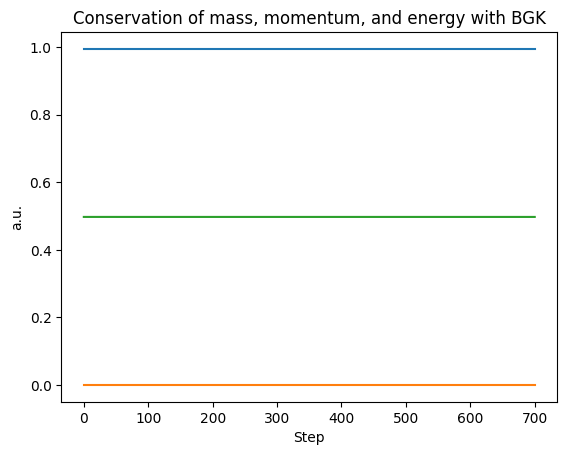

In [9]:
Timesteps = np.arange(0, steps, 50)
plt.plot(Timesteps, mass_histories)
plt.plot(Timesteps, momentum_histories)
plt.plot(Timesteps, energy_histories)
plt.xlabel('Step')
plt.ylabel('a.u.')
plt.title('Conservation of mass, momentum, and energy with BGK')

In [ ]:
# We see that the mass, momentum, and energy in the system are (approximately) conserved.
# However, we can see a tilt in the function f(x,v).
# This results from phase drifting.

step    0 | M=0.99499950 P=1.064e-16 E=0.49749318


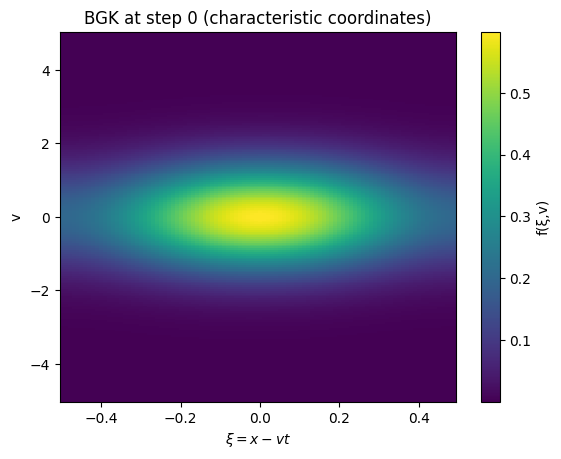

step   50 | M=0.99499950 P=9.592e-17 E=0.49748355


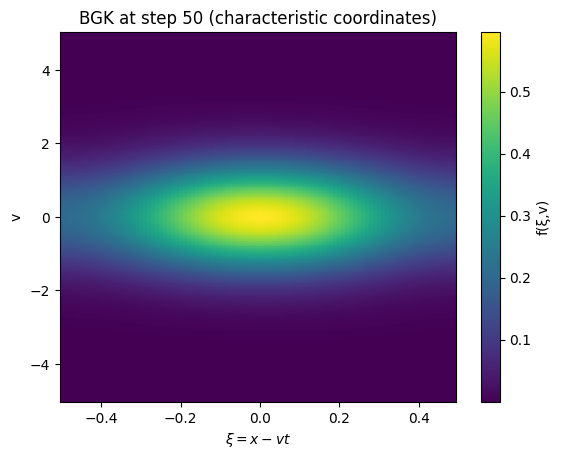

step  100 | M=0.99499950 P=1.288e-16 E=0.49747811


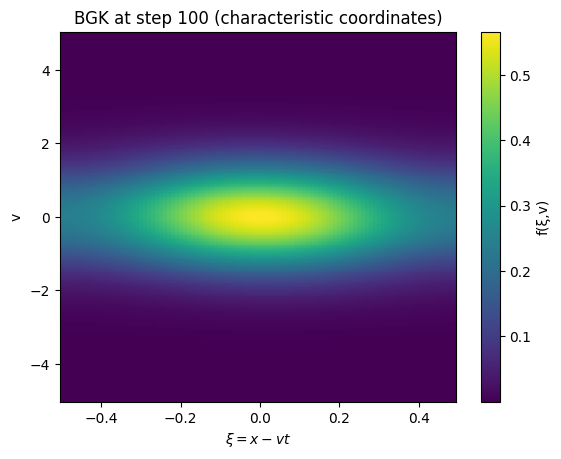

step  150 | M=0.99499950 P=1.772e-16 E=0.49747647


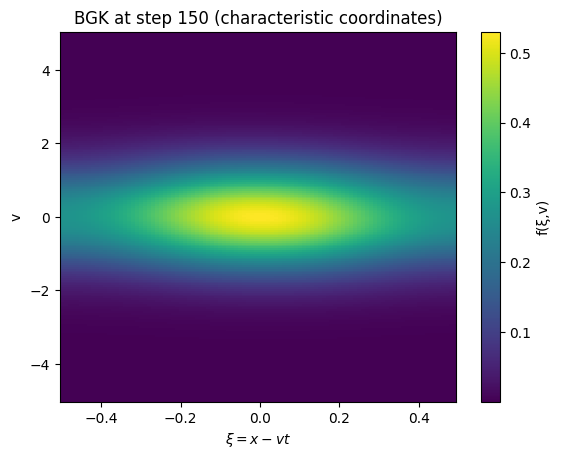

step  200 | M=0.99499950 P=7.994e-17 E=0.49747484


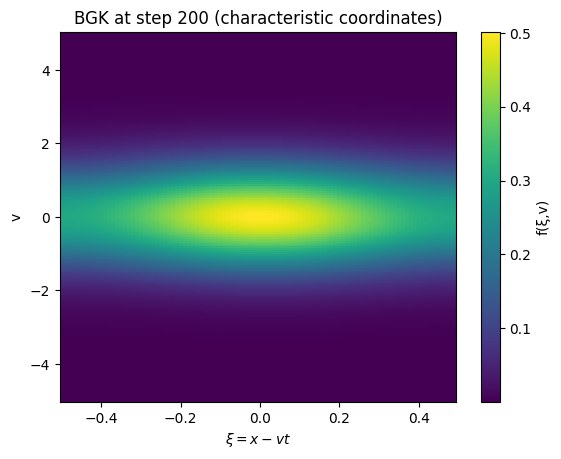

step  250 | M=0.99499950 P=7.283e-17 E=0.49747321


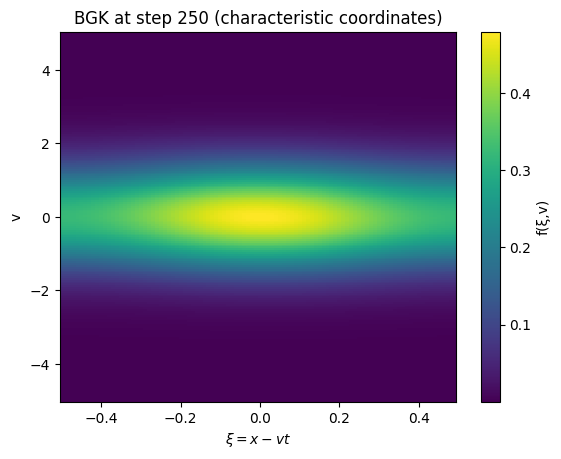

step  300 | M=0.99499950 P=1.363e-16 E=0.49747158


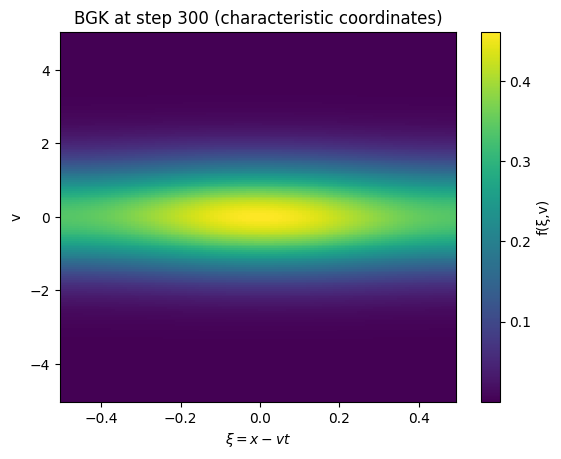

step  350 | M=0.99499950 P=2.105e-16 E=0.49746995


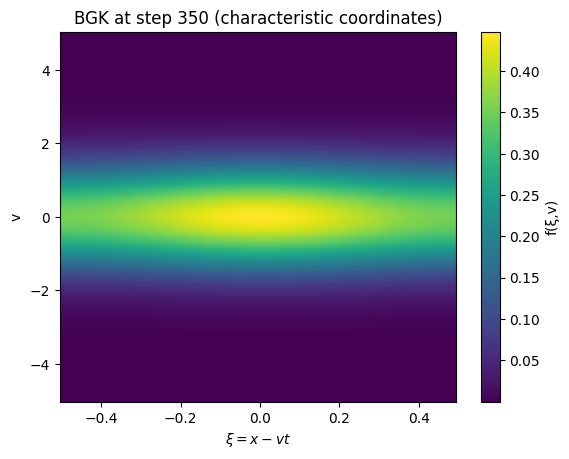

step  400 | M=0.99499950 P=2.309e-16 E=0.49746833


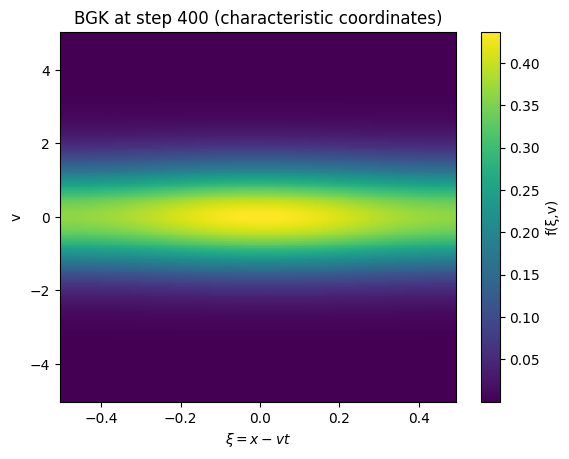

step  450 | M=0.99499950 P=2.949e-16 E=0.49746670


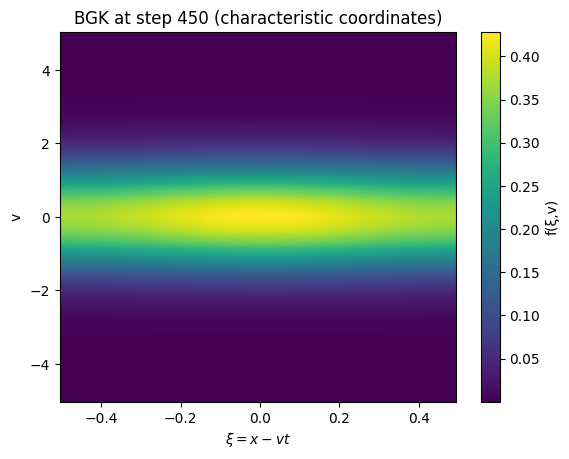

step  500 | M=0.99499950 P=2.305e-16 E=0.49746507


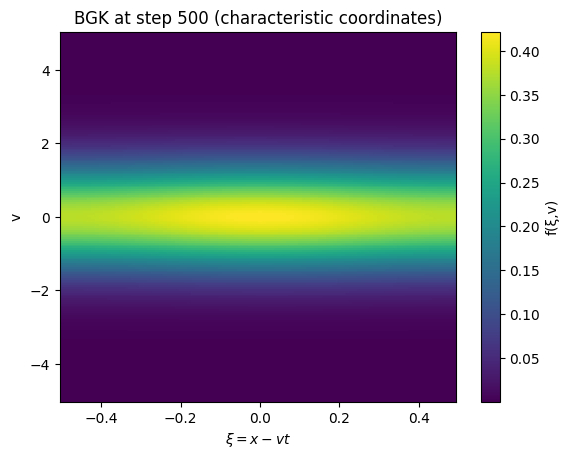

step  550 | M=0.99499950 P=2.069e-16 E=0.49746344


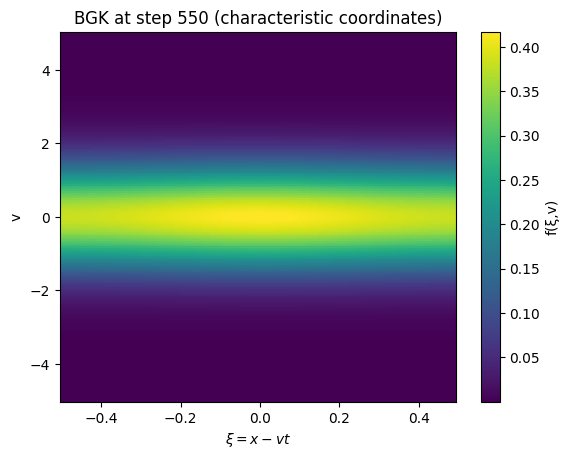

step  600 | M=0.99499950 P=2.700e-16 E=0.49746181


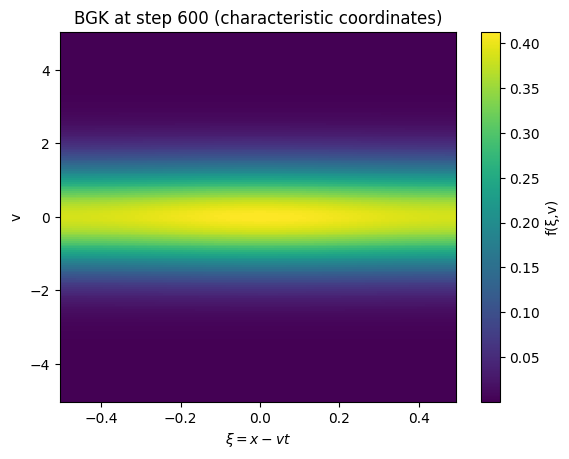

step  650 | M=0.99499950 P=3.006e-16 E=0.49746018


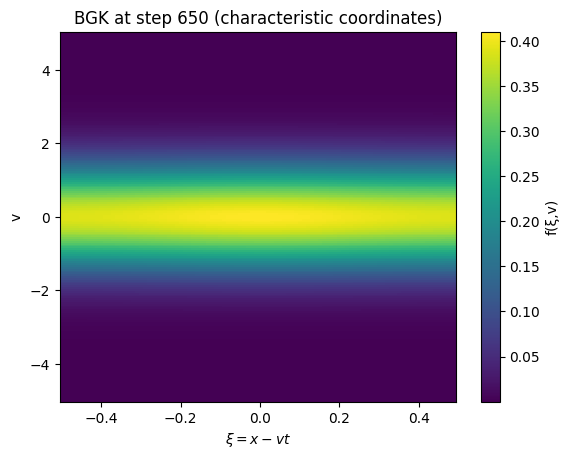

step  700 | M=0.99499950 P=4.143e-16 E=0.49745855


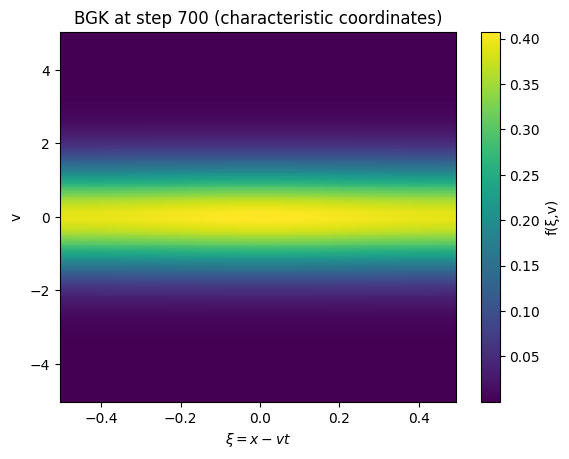

'\n        plt.clf()\n        #plt.subplot(1,2,1)\n        plt.imshow(f.T, origin=\'lower\', aspect=\'auto\', extent=[0, Lx, -Lv, Lv])\n        plt.colorbar(label=\'f(x,v)\')\n        plt.title(f"BGK at step {step}")\n        plt.xlabel(\'x\'); plt.ylabel(\'v\')\n        plt.show()\n'

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1D BGK setup
# ---------------------------

# Discretise phase space

Nx = 100  # spatial points
Nv = 200   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|

dx = Lx / Nx
dv = 2 * Lv / Nv

x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)

# time params
dt = 0.005
nu = 1.0  # collision frequency
steps = 750

# ---------------------------
# Initial distribution f(x, v)
# ---------------------------

# For example: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)

# ---------------------------
# Compute feq, moments,
# ---------------------------

def compute_feq(f):
    # Compute macroscopic moments
    rho = np.sum(f, axis=1) * dv
    u   = np.sum(f * V, axis=1) * dv / rho
    # Local Maxwellian
    feq = np.zeros_like(f)
    for i in range(Nx):
        feq[i, :] = rho[i] / np.sqrt(2*np.pi) * np.exp(-0.5 * (V[i,:] - u[i])**2)
    return feq

def stream_fft(f, v, dt, dx):
    Nx, Nv = f.shape
    k = 2*np.pi*np.fft.fftfreq(Nx, d=dx)
    f_new = np.empty_like(f, dtype=complex)
    for j in range(Nv):
        fh = np.fft.fft(f[:, j])
        fh *= np.exp(-1j * k * v[j] * dt)      # exact shift
        f_new[:, j] = np.fft.ifft(fh)
    return np.real(f_new)


def moments(f, V, dv):
    rho = np.sum(f, axis=1)*dv
    u   = np.sum(f*V, axis=1)*dv / np.maximum(rho,1e-30)
    T   = np.sum(f*(V-u[:,None])**2, axis=1)*dv / np.maximum(rho,1e-30)
    return rho, u, T

def feq_discrete(rho, u, T, V, dv):
    # build weights and normalize *discretely* so ∑_v feq dv = ρ (exact on the grid)
    Tc = np.maximum(T, 1e-12)
    W  = np.exp(-0.5*((V - u[:,None])**2)/Tc[:,None])           # no 1/sqrt(2πT) factor
    Z  = np.sum(W, axis=1)*dv                                   # discrete partition fn
    feq = (rho[:,None]/np.maximum(Z[:,None],1e-300)) * W
    return feq


def collide_bgk(f, feq, nu, dt):
    w = np.exp(-nu*dt)
    return w*f + (1.0 - w)*feq



# ---------------------------
# Main loop
# ---------------------------

mass_histories = []
momentum_histories = []
energy_histories = []

for step in range(steps):
    # 1) exact streaming (periodic)
    f = stream_fft(f, v, dt, dx)

    # 2) conservative BGK collision
    rho, u, T = moments(f, V, dv)
    feq = feq_discrete(rho, u, T, V, dv)     # discrete normalization
    f = collide_bgk(f, feq, nu, dt)

    # define uniform ξ grid
    Nxi = Nx
    xi_grid = np.linspace(-Lx/2, Lx/2, Nxi, endpoint=False)

    f_xi = np.zeros((Nxi, Nv))
    for j in range(Nv):
        # shift x-grid for this velocity
        xi = (x - v[j]*step*dt + Lx/2) % Lx - Lx/2
        # interpolate f[:,j] from x → xi_grid
        f_xi[:,j] = np.interp(xi_grid, xi, f[:,j], period=Lx)

    # 3) Plot
    if step % 50 == 0:
        # Check conservation of mass, omentum, and energy
        mass     = np.sum(f)*dx*dv
        momentum = np.sum(f*V)*dx*dv
        energy   = 0.5*np.sum(f*V**2)*dx*dv
        print(f"step {step:4d} | M={mass:.8f} P={momentum:.3e} E={energy:.8f}")
        


        # then plot regularly
        plt.pcolormesh(xi_grid, v, f_xi.T, shading='auto')
        plt.xlabel(r'$\xi = x - v t$')
        plt.ylabel('v')
        plt.title(f"BGK at step {step} (characteristic coordinates)")
        plt.colorbar(label='f(ξ,v)')
        plt.show()


"""
        plt.clf()
        #plt.subplot(1,2,1)
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x'); plt.ylabel('v')
        plt.show()
"""



